# 환경 설정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

Text(0.5, 1.0, '안녕')

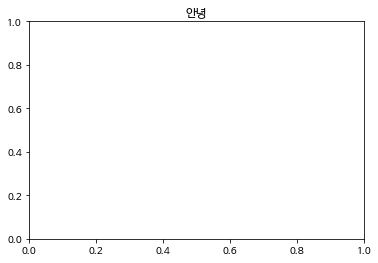

In [ ]:
## colab 환경에서 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.title('안녕')

In [ ]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

# 데이터 전처리 라이브러리
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# 모델링 라이브러리
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from lightgbm import LGBMClassifier

# 모델 평가 및 파라미터 튜닝 라이브러리
from sklearn.metrics import precision_score,accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
raw_df = pd.read_csv('raw_data.csv', encoding='cp949')
raw_df

,지역,시기,연도,월,온열질환자수,기초생활수급자수,지역생산,녹지면적,하천면적,노인인구수,비만인구수,장애인수,성별_남,성별_여,재정자립도,인구밀도,응급의료기관당수용인원,인구수,기온,습도
0,강원강릉시,Jun-14,2014,6,1,6971,4374447,897643.0,3752055.0,353.060252,806,13027,107149,108658,17.4,207.43,53951.75,215807,23.103334,89.562500
1,강원강릉시,Jul-14,2014,7,6,6984,4374447,897643.0,3752055.0,353.088064,806,13029,107149,108658,17.4,207.43,53956.00,215824,28.929032,82.354839
2,강원강릉시,Aug-14,2014,8,0,6970,4374447,897643.0,3752055.0,352.919556,806,13032,107149,108658,17.4,207.43,53930.25,215721,25.548387,87.413793
3,강원강릉시,Jun-15,2015,6,2,6872,4740366,631663.0,3752055.0,363.930588,804,13026,106545,108015,17.4,206.23,53772.25,215089,26.262500,83.625000
4,강원강릉시,Jul-15,2015,7,8,6973,4740366,631663.0,3752055.0,363.705552,804,13032,106545,108015,17.4,206.23,71652.00,214956,23.751613,92.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,충북충주시,Jul-20,2020,7,1,9470,8310083,4255814.0,28756917.0,407.842320,878,13401,106273,103913,18.2,213.69,105114.00,210228,26.787097,93.580645
5492,충북충주시,Aug-20,2020,8,2,9558,8310083,4255814.0,28756917.0,407.989760,878,13423,106273,103913,18.2,213.69,105152.00,210304,30.064516,95.483871
5493,충북충주시,Jun-21,2021,6,0,10863,8409804,4270005.0,28756917.0,428.290434,885,13415,105932,103426,17.3,212.84,104819.00,209638,27.233333,92.000000
5494,충북충주시,Jul-21,2021,7,7,10895,8409804,4270005.0,28756917.0,428.216886,885,13427,105932,103426,17.3,212.84,104801.00,209602,31.406452,93.096774


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역           5496 non-null   object 
 1   시기           5496 non-null   object 
 2   연도           5496 non-null   int64  
 3   월            5496 non-null   int64  
 4   온열질환자수       5496 non-null   int64  
 5   기초생활수급자수     5496 non-null   int64  
 6   지역생산         5496 non-null   int64  
 7   녹지면적         5496 non-null   float64
 8   하천면적         5496 non-null   float64
 9   노인인구수        5496 non-null   float64
 10  비만인구수        5496 non-null   int64  
 11  장애인수         5496 non-null   int64  
 12  성별_남         5496 non-null   int64  
 13  성별_여         5496 non-null   int64  
 14  재정자립도        5496 non-null   float64
 15  인구밀도         5496 non-null   float64
 16  응급의료기관당수용인원  5496 non-null   float64
 17  인구수          5496 non-null   int64  
 18  기온           5496 non-null   float64
 19  습도    

In [ ]:
raw_df = raw_df[raw_df.notnull()]
raw_df

,지역,시기,연도,월,온열질환자수,기초생활수급자수,지역생산,녹지면적,하천면적,노인인구수,비만인구수,장애인수,성별_남,성별_여,재정자립도,인구밀도,응급의료기관당수용인원,인구수,기온,습도
0,강원강릉시,Jun-14,2014,6,1,6971,4374447,897643.0,3752055.0,353.060252,806,13027,107149,108658,17.4,207.43,53951.75,215807,23.103334,89.562500
1,강원강릉시,Jul-14,2014,7,6,6984,4374447,897643.0,3752055.0,353.088064,806,13029,107149,108658,17.4,207.43,53956.00,215824,28.929032,82.354839
2,강원강릉시,Aug-14,2014,8,0,6970,4374447,897643.0,3752055.0,352.919556,806,13032,107149,108658,17.4,207.43,53930.25,215721,25.548387,87.413793
3,강원강릉시,Jun-15,2015,6,2,6872,4740366,631663.0,3752055.0,363.930588,804,13026,106545,108015,17.4,206.23,53772.25,215089,26.262500,83.625000
4,강원강릉시,Jul-15,2015,7,8,6973,4740366,631663.0,3752055.0,363.705552,804,13032,106545,108015,17.4,206.23,71652.00,214956,23.751613,92.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,충북충주시,Jul-20,2020,7,1,9470,8310083,4255814.0,28756917.0,407.842320,878,13401,106273,103913,18.2,213.69,105114.00,210228,26.787097,93.580645
5492,충북충주시,Aug-20,2020,8,2,9558,8310083,4255814.0,28756917.0,407.989760,878,13423,106273,103913,18.2,213.69,105152.00,210304,30.064516,95.483871
5493,충북충주시,Jun-21,2021,6,0,10863,8409804,4270005.0,28756917.0,428.290434,885,13415,105932,103426,17.3,212.84,104819.00,209638,27.233333,92.000000
5494,충북충주시,Jul-21,2021,7,7,10895,8409804,4270005.0,28756917.0,428.216886,885,13427,105932,103426,17.3,212.84,104801.00,209602,31.406452,93.096774


In [ ]:
#raw_df.drop([5496], axis=0, inplace=True)
#raw_df

# 전처리

In [ ]:
df = pd.DataFrame({'column' : range(1000000)})
df

,column
0,0
1,1
2,2
3,3
4,4
...,...
999995,999995
999996,999996
999997,999997
999998,999998


In [ ]:
import time
start = time.time()

def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
df['column'] = df['column'].apply(binary)

print("time: ", time.time() - start) # time:  0.375652551651001

time:  0.39905786514282227


In [ ]:
df

,column
0,0
1,1
2,1
3,1
4,1
...,...
999995,1
999996,1
999997,1
999998,1


## binary 이진 분류

In [ ]:
raw_df['온열질환발생여부'] = raw_df['온열질환자수'].apply(binary)

In [ ]:
raw_df.isna().sum()

지역             0
시기             0
연도             0
월              0
온열질환자수         0
기초생활수급자수       0
지역생산           0
녹지면적           0
하천면적           0
노인인구수          0
비만인구수          0
장애인수           0
성별_남           0
성별_여           0
재정자립도          0
인구밀도           0
응급의료기관당수용인원    0
인구수            0
기온             0
습도             0
온열질환발생여부       0
dtype: int64

# 데이터 타입 변환

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역           5496 non-null   object 
 1   시기           5496 non-null   object 
 2   연도           5496 non-null   int64  
 3   월            5496 non-null   int64  
 4   온열질환자수       5496 non-null   int64  
 5   기초생활수급자수     5496 non-null   int64  
 6   지역생산         5496 non-null   int64  
 7   녹지면적         5496 non-null   float64
 8   하천면적         5496 non-null   float64
 9   노인인구수        5496 non-null   float64
 10  비만인구수        5496 non-null   int64  
 11  장애인수         5496 non-null   int64  
 12  성별_남         5496 non-null   int64  
 13  성별_여         5496 non-null   int64  
 14  재정자립도        5496 non-null   float64
 15  인구밀도         5496 non-null   float64
 16  응급의료기관당수용인원  5496 non-null   float64
 17  인구수          5496 non-null   int64  
 18  기온           5496 non-null   float64
 19  습도    

In [ ]:
raw_df = raw_df.astype({'지역':'str'})
raw_df = raw_df.astype({'연도':'str'})
raw_df = raw_df.astype({'온열질환발생여부':'int'})
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역           5496 non-null   object 
 1   시기           5496 non-null   object 
 2   연도           5496 non-null   object 
 3   월            5496 non-null   int64  
 4   온열질환자수       5496 non-null   int64  
 5   기초생활수급자수     5496 non-null   int64  
 6   지역생산         5496 non-null   int64  
 7   녹지면적         5496 non-null   float64
 8   하천면적         5496 non-null   float64
 9   노인인구수        5496 non-null   float64
 10  비만인구수        5496 non-null   int64  
 11  장애인수         5496 non-null   int64  
 12  성별_남         5496 non-null   int64  
 13  성별_여         5496 non-null   int64  
 14  재정자립도        5496 non-null   float64
 15  인구밀도         5496 non-null   float64
 16  응급의료기관당수용인원  5496 non-null   float64
 17  인구수          5496 non-null   int64  
 18  기온           5496 non-null   float64
 19  습도    

# 불필요 변수 제거
## 

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역           5496 non-null   object 
 1   시기           5496 non-null   object 
 2   연도           5496 non-null   object 
 3   월            5496 non-null   int64  
 4   온열질환자수       5496 non-null   int64  
 5   기초생활수급자수     5496 non-null   int64  
 6   지역생산         5496 non-null   int64  
 7   녹지면적         5496 non-null   float64
 8   하천면적         5496 non-null   float64
 9   노인인구수        5496 non-null   float64
 10  비만인구수        5496 non-null   int64  
 11  장애인수         5496 non-null   int64  
 12  성별_남         5496 non-null   int64  
 13  성별_여         5496 non-null   int64  
 14  재정자립도        5496 non-null   float64
 15  인구밀도         5496 non-null   float64
 16  응급의료기관당수용인원  5496 non-null   float64
 17  인구수          5496 non-null   int64  
 18  기온           5496 non-null   float64
 19  습도    

# EDA (탐색적 데이터 분석)

In [ ]:
raw_df_cor = raw_df.drop(["지역", "시기", "연도", "월", "온열질환발생여부"], axis=1)
raw_df_cor

,온열질환자수,기초생활수급자수,지역생산,녹지면적,하천면적,노인인구수,비만인구수,장애인수,성별_남,성별_여,재정자립도,인구밀도,응급의료기관당수용인원,인구수,기온,습도
0,1,6971,4374447,897643.0,3752055.0,353.060252,806,13027,107149,108658,17.4,207.43,53951.75,215807,23.103334,89.562500
1,6,6984,4374447,897643.0,3752055.0,353.088064,806,13029,107149,108658,17.4,207.43,53956.00,215824,28.929032,82.354839
2,0,6970,4374447,897643.0,3752055.0,352.919556,806,13032,107149,108658,17.4,207.43,53930.25,215721,25.548387,87.413793
3,2,6872,4740366,631663.0,3752055.0,363.930588,804,13026,106545,108015,17.4,206.23,53772.25,215089,26.262500,83.625000
4,8,6973,4740366,631663.0,3752055.0,363.705552,804,13032,106545,108015,17.4,206.23,71652.00,214956,23.751613,92.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,1,9470,8310083,4255814.0,28756917.0,407.842320,878,13401,106273,103913,18.2,213.69,105114.00,210228,26.787097,93.580645
5492,2,9558,8310083,4255814.0,28756917.0,407.989760,878,13423,106273,103913,18.2,213.69,105152.00,210304,30.064516,95.483871
5493,0,10863,8409804,4270005.0,28756917.0,428.290434,885,13415,105932,103426,17.3,212.84,104819.00,209638,27.233333,92.000000
5494,7,10895,8409804,4270005.0,28756917.0,428.216886,885,13427,105932,103426,17.3,212.84,104801.00,209602,31.406452,93.096774


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


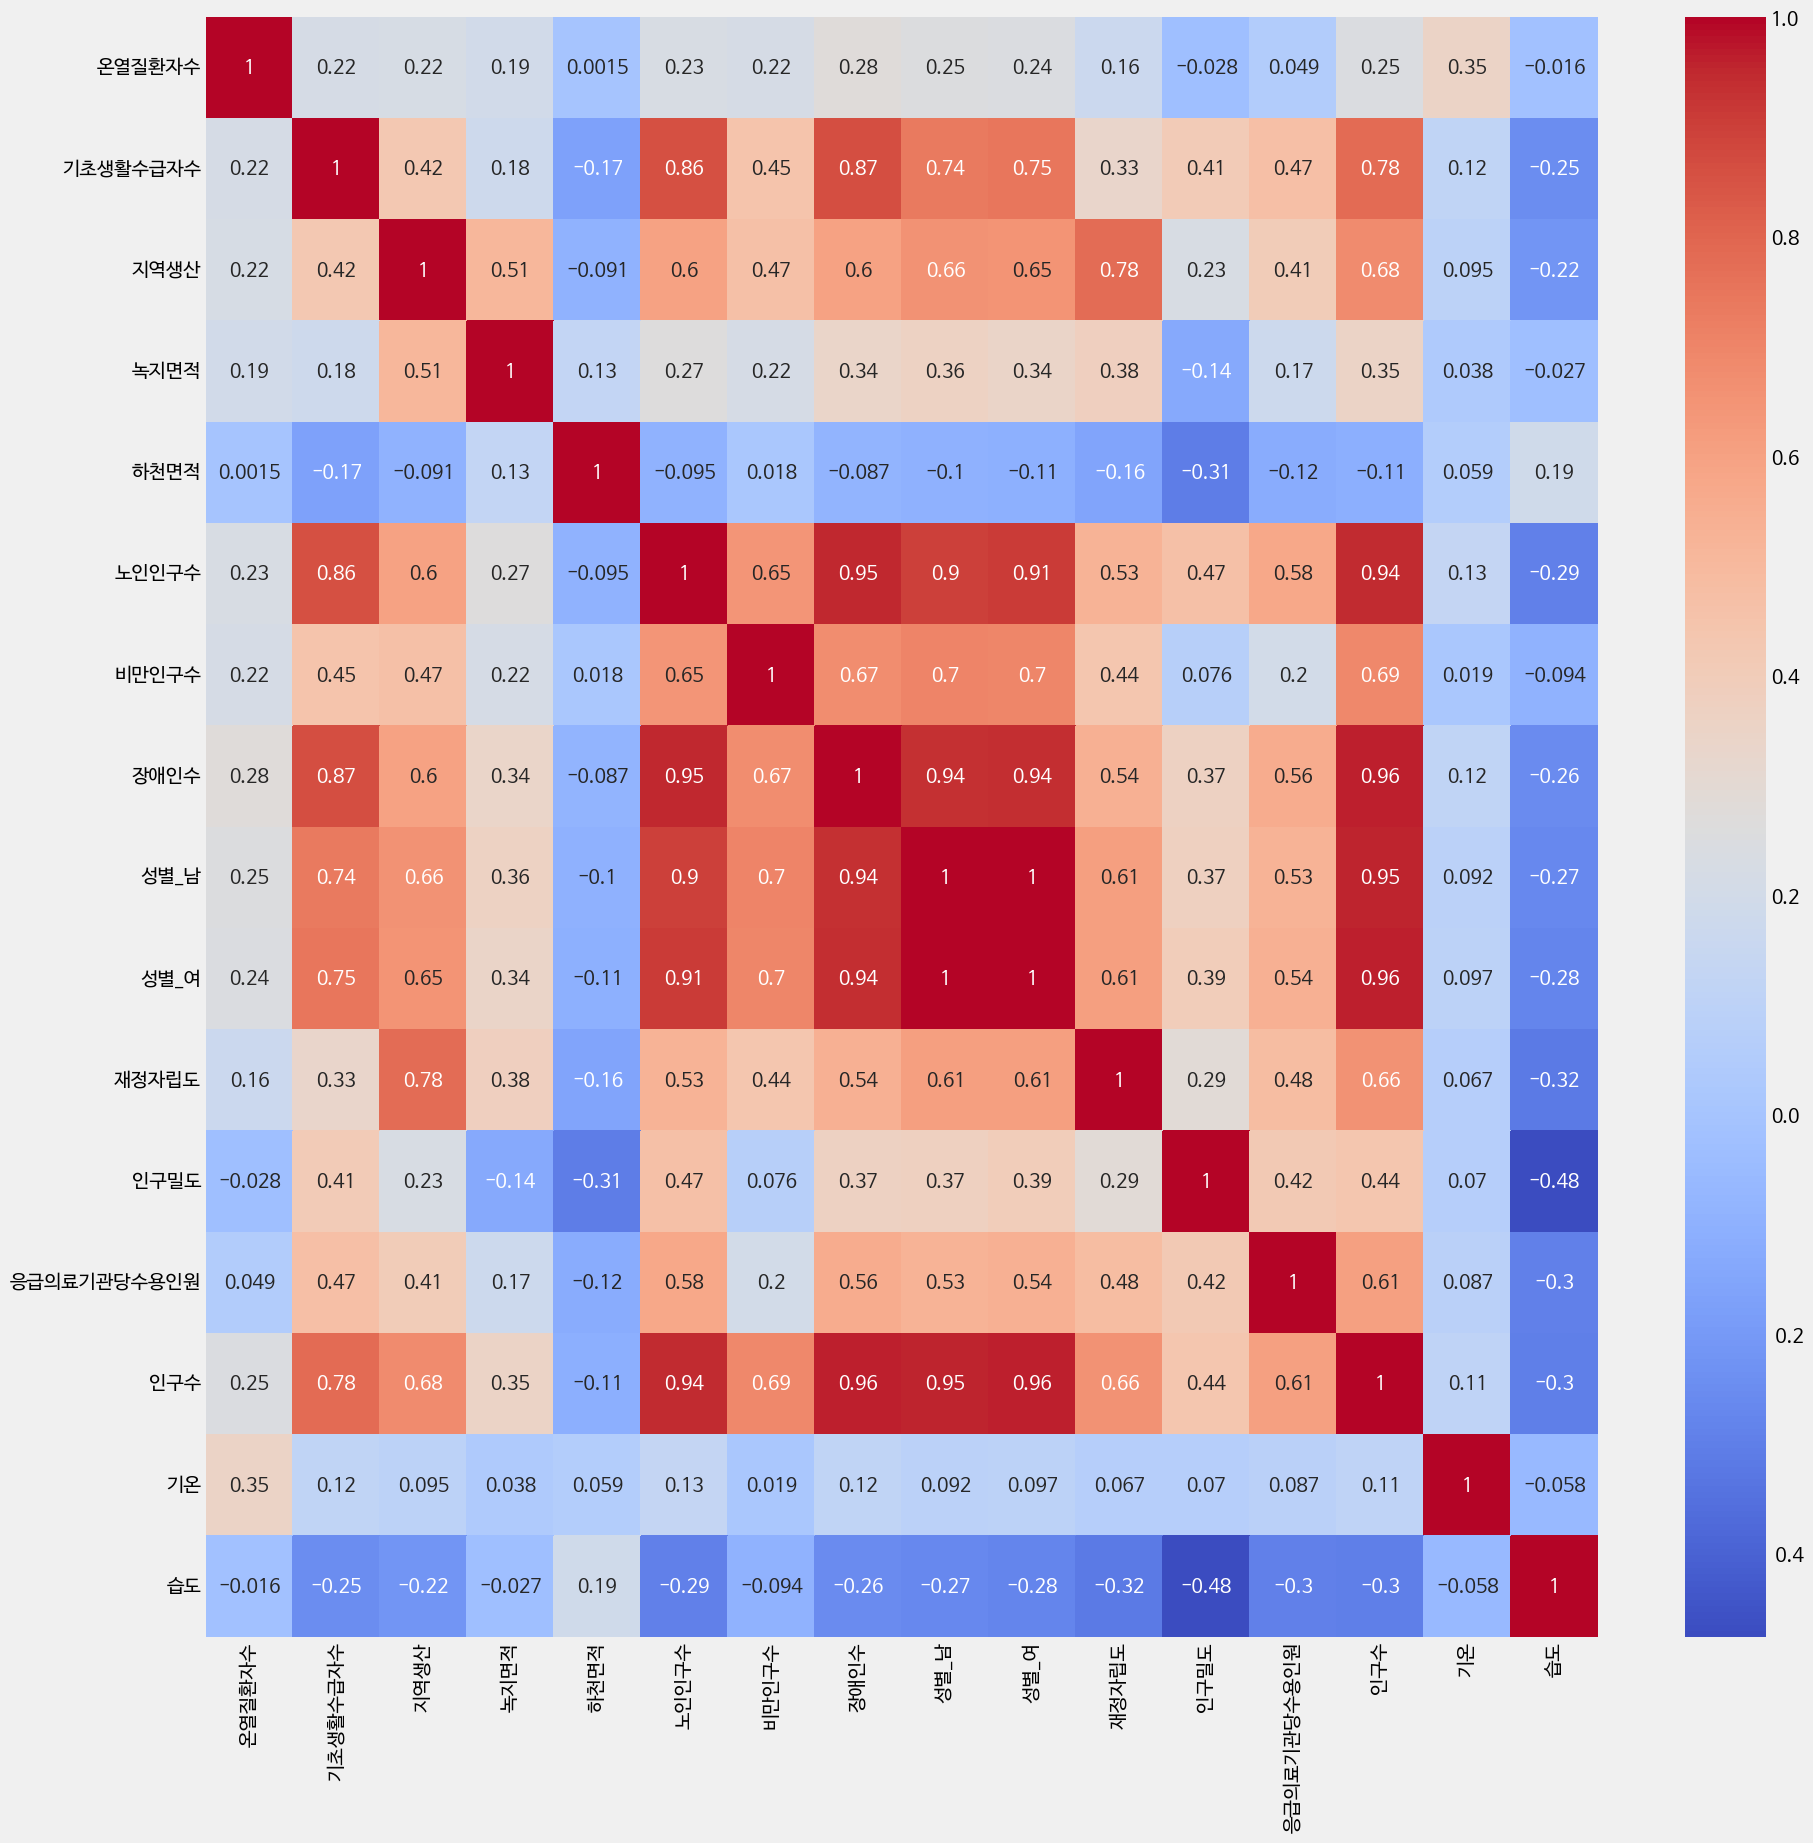

In [ ]:
# 상관 행렬
plt.rc('font', family='NanumBarunGothic') 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,20))
sns.heatmap(raw_df_cor.corr(), cmap= 'coolwarm', annot=True)

In [ ]:
#plt.style.use('default')
#sns.pairplot(raw_df, hue="온열질환발생여부")
#plt.title("온열질환자수에 따른 산점도 행렬")
#plt.show()

In [ ]:
raw_df['온열질환발생여부'].value_counts()

1    2925
0    2571
Name: 온열질환발생여부, dtype: int64

In [ ]:
import plotly.express as px
fig = px.histogram(raw_df, x="온열질환발생여부")
fig.update_layout(height = 600, width = 800, hovermode = 'closest')

In [ ]:
# marginal_x, marginal_y = "violin"
px.scatter(raw_df, x="온열질환발생여부", y="기온", color="월", 
           marginal_x="violin", marginal_y="violin",
           template="plotly_dark")

In [ ]:
raw_df

,지역,시기,연도,월,온열질환자수,기초생활수급자수,지역생산,녹지면적,하천면적,노인인구수,...,장애인수,성별_남,성별_여,재정자립도,인구밀도,응급의료기관당수용인원,인구수,기온,습도,온열질환발생여부
0,강원강릉시,Jun-14,2014,6,1,6971,4374447,897643.0,3752055.0,353.060252,...,13027,107149,108658,17.4,207.43,53951.75,215807,23.103334,89.562500,1
1,강원강릉시,Jul-14,2014,7,6,6984,4374447,897643.0,3752055.0,353.088064,...,13029,107149,108658,17.4,207.43,53956.00,215824,28.929032,82.354839,1
2,강원강릉시,Aug-14,2014,8,0,6970,4374447,897643.0,3752055.0,352.919556,...,13032,107149,108658,17.4,207.43,53930.25,215721,25.548387,87.413793,0
3,강원강릉시,Jun-15,2015,6,2,6872,4740366,631663.0,3752055.0,363.930588,...,13026,106545,108015,17.4,206.23,53772.25,215089,26.262500,83.625000,1
4,강원강릉시,Jul-15,2015,7,8,6973,4740366,631663.0,3752055.0,363.705552,...,13032,106545,108015,17.4,206.23,71652.00,214956,23.751613,92.967742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,충북충주시,Jul-20,2020,7,1,9470,8310083,4255814.0,28756917.0,407.842320,...,13401,106273,103913,18.2,213.69,105114.00,210228,26.787097,93.580645,1
5492,충북충주시,Aug-20,2020,8,2,9558,8310083,4255814.0,28756917.0,407.989760,...,13423,106273,103913,18.2,213.69,105152.00,210304,30.064516,95.483871,1
5493,충북충주시,Jun-21,2021,6,0,10863,8409804,4270005.0,28756917.0,428.290434,...,13415,105932,103426,17.3,212.84,104819.00,209638,27.233333,92.000000,0
5494,충북충주시,Jul-21,2021,7,7,10895,8409804,4270005.0,28756917.0,428.216886,...,13427,105932,103426,17.3,212.84,104801.00,209602,31.406452,93.096774,1


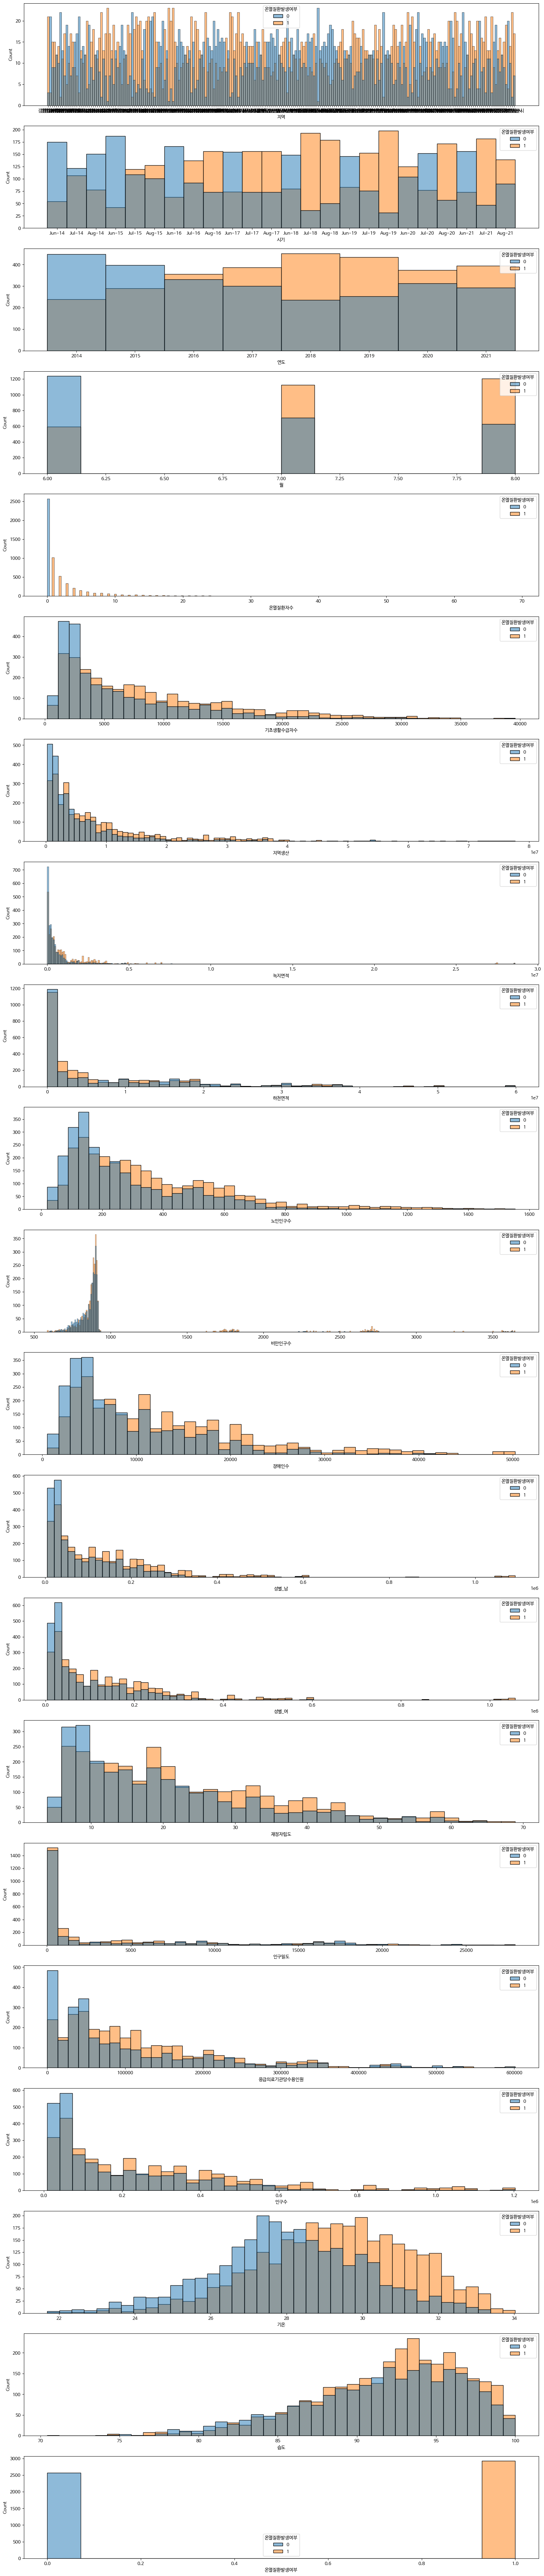

In [ ]:
plt.style.use('default')
## colab 환경에서 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

fig, ax =plt.subplots(21,1,figsize=(20,100))
x=0
for i in range(0, 21):
    sns.histplot(x=raw_df.columns[x], data=raw_df, hue='온열질환발생여부', ax=ax[i]);
    fig.show()
    x+=1

# X, y 할당

In [ ]:
raw_df

,지역,시기,연도,월,온열질환자수,기초생활수급자수,지역생산,녹지면적,하천면적,노인인구수,...,장애인수,성별_남,성별_여,재정자립도,인구밀도,응급의료기관당수용인원,인구수,기온,습도,온열질환발생여부
0,강원강릉시,Jun-14,2014,6,1,6971,4374447,897643.0,3752055.0,353.060252,...,13027,107149,108658,17.4,207.43,53951.75,215807,23.103334,89.562500,1
1,강원강릉시,Jul-14,2014,7,6,6984,4374447,897643.0,3752055.0,353.088064,...,13029,107149,108658,17.4,207.43,53956.00,215824,28.929032,82.354839,1
2,강원강릉시,Aug-14,2014,8,0,6970,4374447,897643.0,3752055.0,352.919556,...,13032,107149,108658,17.4,207.43,53930.25,215721,25.548387,87.413793,0
3,강원강릉시,Jun-15,2015,6,2,6872,4740366,631663.0,3752055.0,363.930588,...,13026,106545,108015,17.4,206.23,53772.25,215089,26.262500,83.625000,1
4,강원강릉시,Jul-15,2015,7,8,6973,4740366,631663.0,3752055.0,363.705552,...,13032,106545,108015,17.4,206.23,71652.00,214956,23.751613,92.967742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,충북충주시,Jul-20,2020,7,1,9470,8310083,4255814.0,28756917.0,407.842320,...,13401,106273,103913,18.2,213.69,105114.00,210228,26.787097,93.580645,1
5492,충북충주시,Aug-20,2020,8,2,9558,8310083,4255814.0,28756917.0,407.989760,...,13423,106273,103913,18.2,213.69,105152.00,210304,30.064516,95.483871,1
5493,충북충주시,Jun-21,2021,6,0,10863,8409804,4270005.0,28756917.0,428.290434,...,13415,105932,103426,17.3,212.84,104819.00,209638,27.233333,92.000000,0
5494,충북충주시,Jul-21,2021,7,7,10895,8409804,4270005.0,28756917.0,428.216886,...,13427,105932,103426,17.3,212.84,104801.00,209602,31.406452,93.096774,1


In [ ]:
X = raw_df.drop(['시기','연도','지역', '월', '온열질환자수', '인구수', '온열질환발생여부'], axis=1)
y = raw_df['온열질환발생여부']

KeyboardInterrupt: ignored

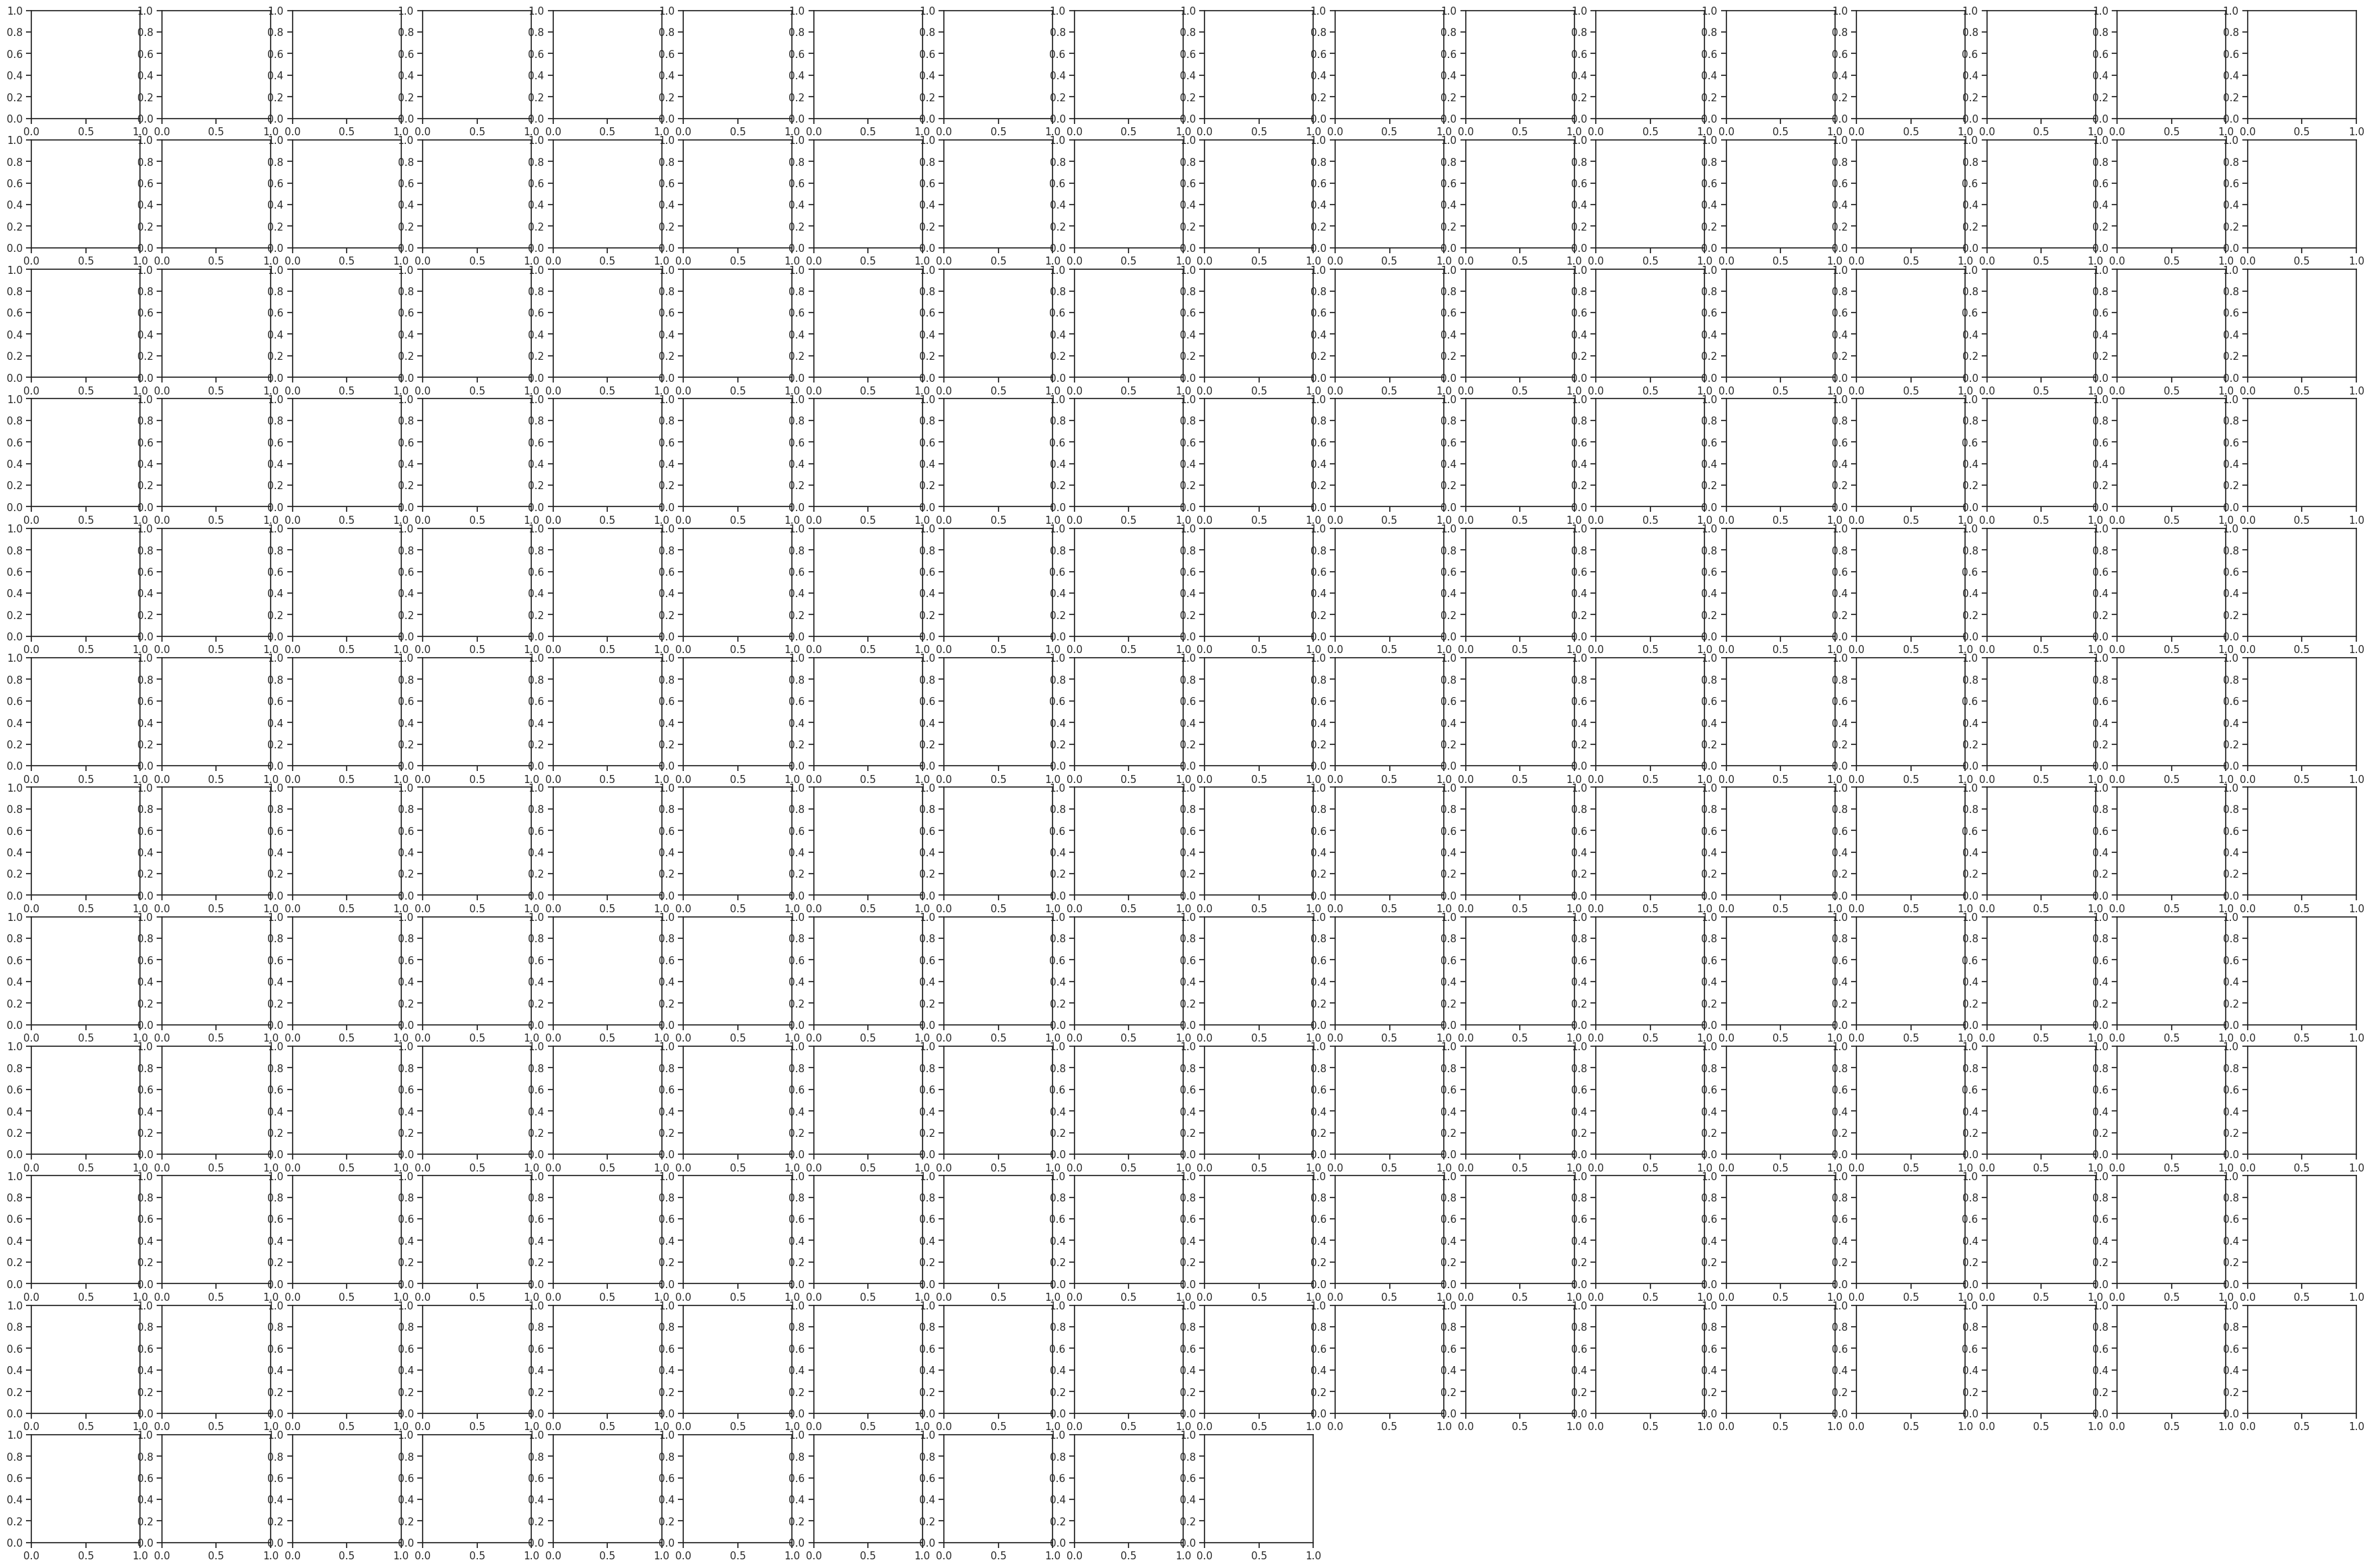

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(raw_df, hue="온열질환발생여부")

# X에 따른 y분포

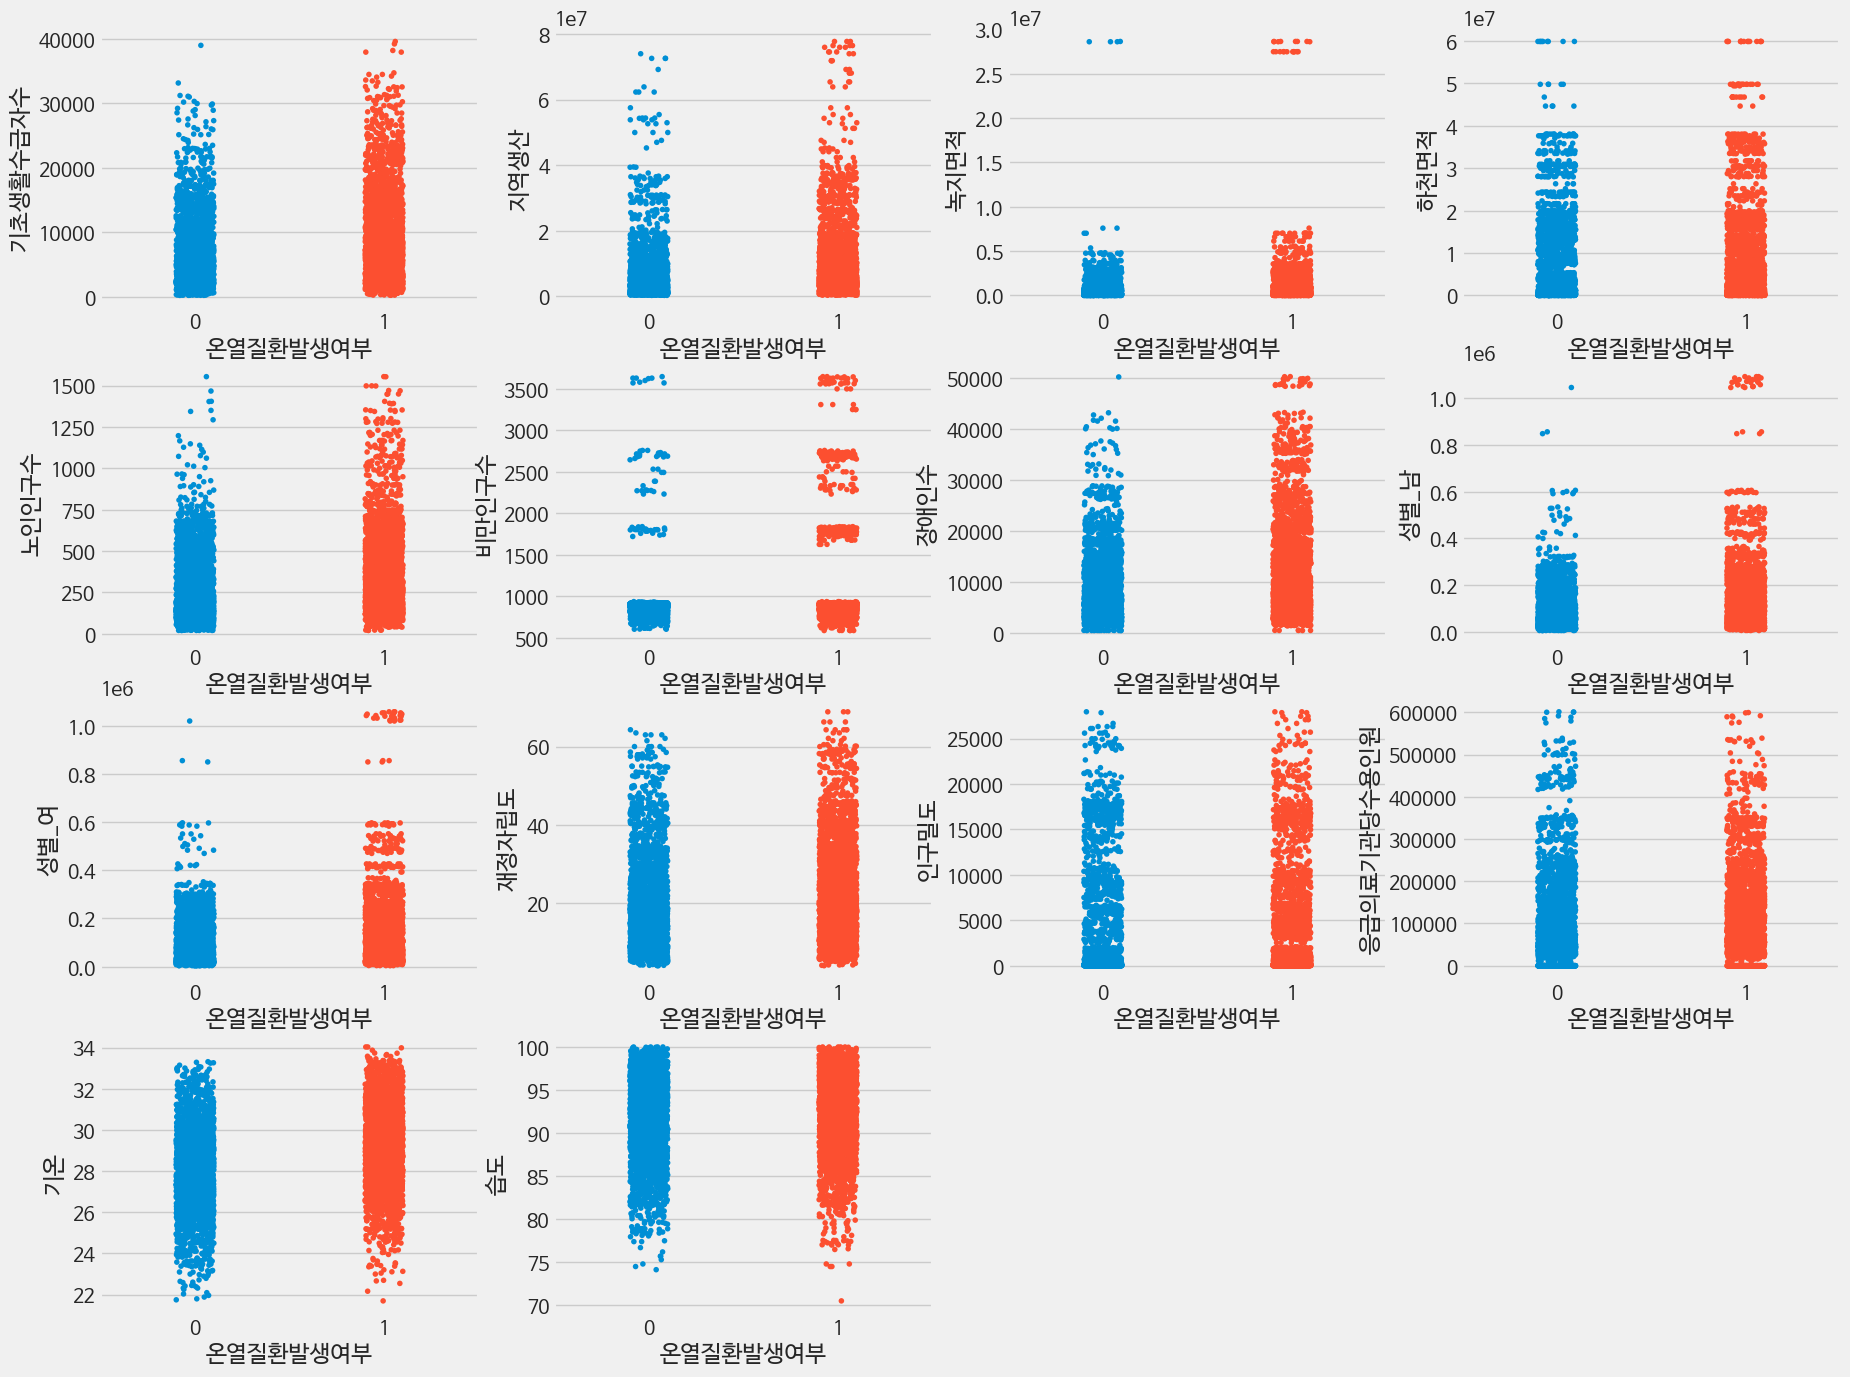

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('default')
import seaborn as sns
plt.figure(figsize = (20, 20))

for n, column in enumerate(X.columns):
    plt.subplot(5, 4, n + 1)
    sns.stripplot(x = y , y = X[column], size = 4)

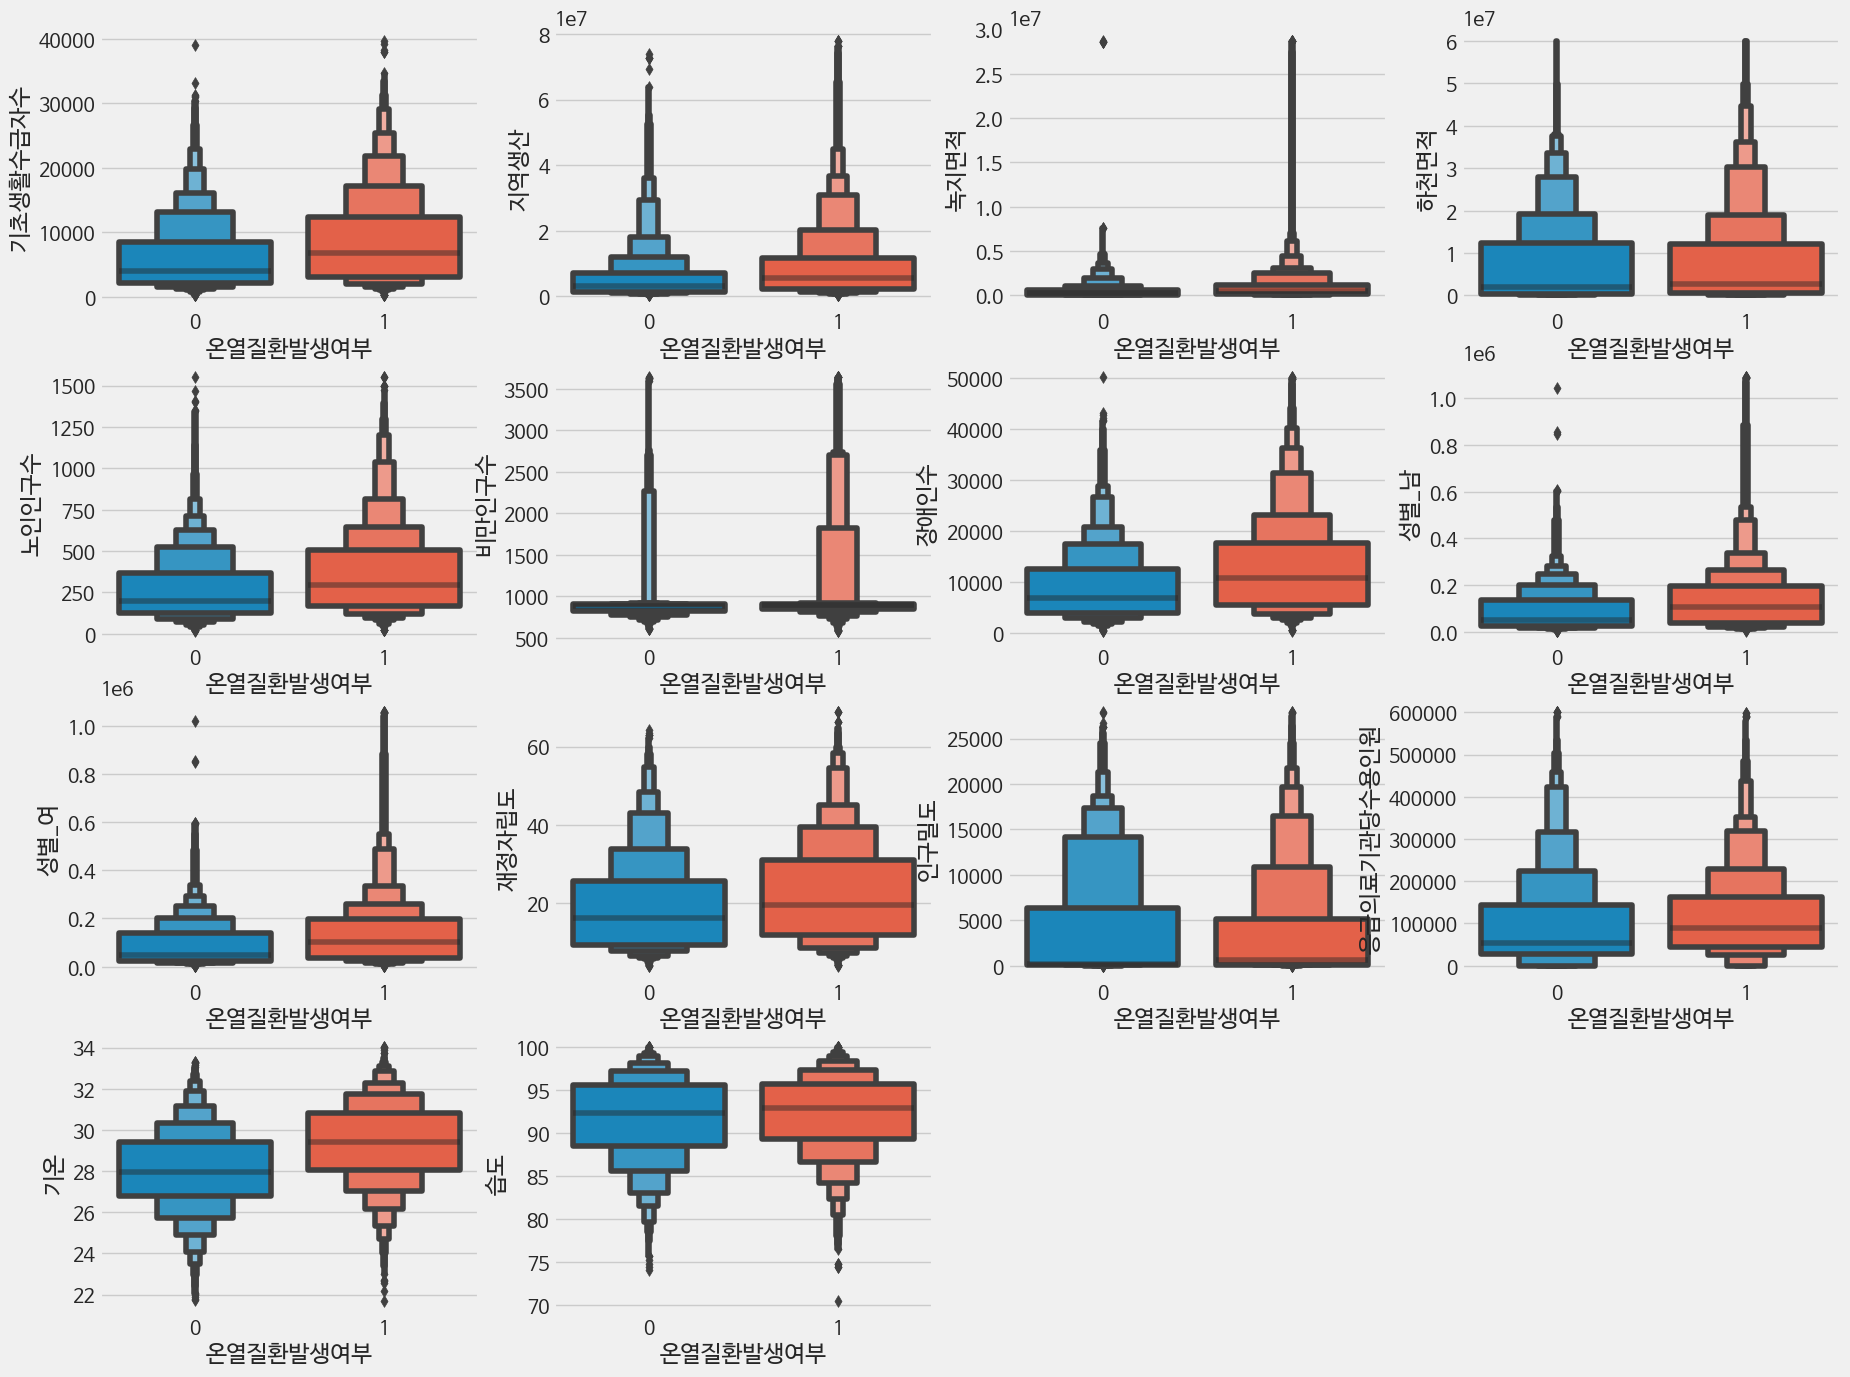

In [ ]:
# X에 따른 target의 분포
import seaborn as sns
plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
plt.figure(figsize = (20, 20))

for n, column in enumerate(X.columns):
    plt.subplot(5, 4, n + 1)
    sns.boxenplot(x = y , y = X[column])

In [ ]:
raw_df

,지역,시기,연도,월,온열질환자수,기초생활수급자수,지역생산,녹지면적,하천면적,노인인구수,...,장애인수,성별_남,성별_여,재정자립도,인구밀도,응급의료기관당수용인원,인구수,기온,습도,온열질환발생여부
0,강원강릉시,Jun-14,2014,6,1,6971,4374447,897643.0,3752055.0,353.060252,...,13027,107149,108658,17.4,207.43,53951.75,215807,23.103334,89.562500,1
1,강원강릉시,Jul-14,2014,7,6,6984,4374447,897643.0,3752055.0,353.088064,...,13029,107149,108658,17.4,207.43,53956.00,215824,28.929032,82.354839,1
2,강원강릉시,Aug-14,2014,8,0,6970,4374447,897643.0,3752055.0,352.919556,...,13032,107149,108658,17.4,207.43,53930.25,215721,25.548387,87.413793,0
3,강원강릉시,Jun-15,2015,6,2,6872,4740366,631663.0,3752055.0,363.930588,...,13026,106545,108015,17.4,206.23,53772.25,215089,26.262500,83.625000,1
4,강원강릉시,Jul-15,2015,7,8,6973,4740366,631663.0,3752055.0,363.705552,...,13032,106545,108015,17.4,206.23,71652.00,214956,23.751613,92.967742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5491,충북충주시,Jul-20,2020,7,1,9470,8310083,4255814.0,28756917.0,407.842320,...,13401,106273,103913,18.2,213.69,105114.00,210228,26.787097,93.580645,1
5492,충북충주시,Aug-20,2020,8,2,9558,8310083,4255814.0,28756917.0,407.989760,...,13423,106273,103913,18.2,213.69,105152.00,210304,30.064516,95.483871,1
5493,충북충주시,Jun-21,2021,6,0,10863,8409804,4270005.0,28756917.0,428.290434,...,13415,105932,103426,17.3,212.84,104819.00,209638,27.233333,92.000000,0
5494,충북충주시,Jul-21,2021,7,7,10895,8409804,4270005.0,28756917.0,428.216886,...,13427,105932,103426,17.3,212.84,104801.00,209602,31.406452,93.096774,1


In [ ]:
y.value_counts()

1    2925
0    2571
Name: 온열질환발생여부, dtype: int64

In [ ]:
raw_df['응급의료기관당수용인원'].value_counts()

0.00000         695
25181.00000       3
42962.00000       2
67084.00000       2
39305.00000       2
               ... 
36396.66667       1
36404.66667       1
36441.33333       1
36448.33333       1
104773.00000      1
Name: 응급의료기관당수용인원, Length: 4747, dtype: int64

In [ ]:
raw_df.dtypes

지역              object
시기              object
연도              object
월                int64
온열질환자수           int64
기초생활수급자수         int64
지역생산             int64
녹지면적           float64
하천면적           float64
노인인구수          float64
비만인구수            int64
장애인수             int64
성별_남             int64
성별_여             int64
재정자립도          float64
인구밀도           float64
응급의료기관당수용인원    float64
인구수              int64
기온             float64
습도             float64
온열질환발생여부         int64
dtype: object

In [ ]:
y.value_counts()

# ★☆분석 직전 변수 선택★☆


In [ ]:
X_region = raw_df.drop(['온열질환자수', '월' ,'성별_남','성별_여','인구수',
                        '비만인구수' ,'시기','연도','응급의료기관당수용인원', '온열질환발생여부',
                        '장애인수', '습도', '하천면적'], axis=1)

y = raw_df['온열질환발생여부'] 
X_region, y

(         지역  기초생활수급자수     지역생산       녹지면적       노인인구수  재정자립도    인구밀도  \
 0     강원강릉시      6971  4374447   897643.0  353.060252   17.4  207.43   
 1     강원강릉시      6984  4374447   897643.0  353.088064   17.4  207.43   
 2     강원강릉시      6970  4374447   897643.0  352.919556   17.4  207.43   
 3     강원강릉시      6872  4740366   631663.0  363.930588   17.4  206.23   
 4     강원강릉시      6973  4740366   631663.0  363.705552   17.4  206.23   
 ...     ...       ...      ...        ...         ...    ...     ...   
 5491  충북충주시      9470  8310083  4255814.0  407.842320   18.2  213.69   
 5492  충북충주시      9558  8310083  4255814.0  407.989760   18.2  213.69   
 5493  충북충주시     10863  8409804  4270005.0  428.290434   17.3  212.84   
 5494  충북충주시     10895  8409804  4270005.0  428.216886   17.3  212.84   
 5495  충북충주시     10942  8409804  4270005.0  428.102478   17.3  212.84   
 
              기온  
 0     23.103334  
 1     28.929032  
 2     25.548387  
 3     26.262500  
 4     23.751613  
 ...    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

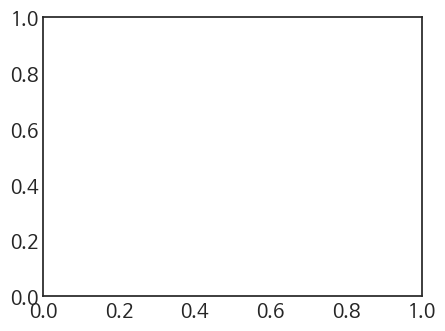

In [ ]:
plt.style.use('seaborn-white')
plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize = (20, 20))
for n, column in enumerate(X_region.columns):
    plt.subplot(5, 4, n + 1)
    sns.distplot(X_region[column], color = 'r')

# 2. train test 분할

In [ ]:
X_train_region, X_test_region, y_train, y_test = train_test_split(X_region, y, test_size = 0.2, random_state=42, stratify=X_region['지역'] )
X_test_region

,지역,기초생활수급자수,지역생산,녹지면적,노인인구수,재정자립도,인구밀도,기온
274,강원철원군,1913,1741189,65491.0,91.239262,8.8,53.05,28.461290
765,경기시흥시,15271,16621921,2514823.0,491.884068,40.2,3665.64,26.966667
122,강원양구군,1209,739788,35394.0,40.101920,8.1,33.81,26.945161
4397,전남장흥군,2637,807614,371822.0,119.061425,6.0,69.90,26.963333
796,경기안성시,4658,7774317,1446372.0,254.765158,33.6,325.62,29.077420
...,...,...,...,...,...,...,...,...
2652,부산기장군,6029,5437095,2100538.0,232.594860,33.3,755.22,25.312903
1141,경기하남시,3745,6491728,647052.0,282.607560,44.1,2735.94,31.764516
3015,서울강남구,12280,71852681,799434.0,675.410010,54.4,13801.75,27.466667
1980,경북예천군,2221,1194195,447876.0,159.328080,8.8,80.54,27.587096


In [ ]:
X_train_region['지역'].value_counts()

광주북구     20
경북문경시    20
강원홍천군    20
서울강동구    20
충북제천시    20
         ..
경북구미시    19
경남거창군    19
서울중랑구    19
경북상주시    19
경기이천시    19
Name: 지역, Length: 229, dtype: int64

In [ ]:
X_test_region['지역'].value_counts()

강원철원군    5
대전유성구    5
울산중구     5
서울강서구    5
강원동해시    5
        ..
서울강북구    4
전북순창군    4
강원화천군    4
부산동래구    4
경북울진군    4
Name: 지역, Length: 229, dtype: int64

# Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = X_train_region.drop(["지역"], axis=1)
col= X_train.columns
X_train[col] = st.fit_transform(X_train[col])
X_train

,기초생활수급자수,지역생산,녹지면적,노인인구수,재정자립도,인구밀도,기온
4573,-0.092068,-0.501263,-0.206970,-0.291593,-0.749608,-0.609965,1.511564
5002,0.058858,-0.359823,0.504718,-0.374847,-0.408112,-0.606116,-0.217527
1303,-0.336461,-0.505916,0.433784,-0.294117,-0.470202,-0.613350,1.182950
4430,-0.855586,-0.694996,-0.394872,-0.921409,-1.052298,-0.623957,1.300551
4436,-0.839651,-0.687404,-0.414686,-0.926222,-0.997969,-0.623954,1.132044
...,...,...,...,...,...,...,...
1355,-0.864933,-0.679629,-0.395544,-0.855057,-0.943640,-0.628087,0.588572
4249,-0.837352,-0.699048,0.014106,-0.771654,-1.230808,-0.624647,-2.224225
5282,-0.931126,-0.677734,-0.320795,-0.928239,-1.067821,-0.625976,-1.029699
2354,1.065084,-0.291243,0.147423,0.747536,-0.322738,-0.322610,-0.285841


In [ ]:
X_test = X_test_region.drop(["지역"], axis=1)
col= X_test.columns 
X_test[col] = st.fit_transform(X_test[col])
X_test

,기초생활수급자수,지역생산,녹지면적,노인인구수,재정자립도,인구밀도,기온
274,-0.867747,-0.596058,-0.390740,-0.945611,-0.960775,-0.624144,-0.117588
765,1.214781,0.845929,0.773280,0.691581,1.518264,-0.026897,-0.831256
122,-0.977501,-0.693096,-0.405043,-1.154579,-1.016040,-0.627325,-0.841524
4397,-0.754874,-0.686524,-0.245159,-0.831919,-1.181836,-0.621358,-0.832847
796,-0.439798,-0.011430,0.265509,-0.277380,0.997192,-0.579082,0.176608
...,...,...,...,...,...,...,...
2652,-0.226058,-0.237914,0.576395,-0.367977,0.973507,-0.508058,-1.620911
1141,-0.582136,-0.135717,-0.114359,-0.163605,1.826170,-0.180598,1.459670
3015,0.748481,6.197951,-0.041941,1.441540,2.639359,1.648844,-0.592510
1980,-0.819729,-0.649063,-0.209015,-0.667374,-0.960775,-0.619599,-0.535006


In [ ]:
X.index

RangeIndex(start=0, stop=5496, step=1)

---
# New 차원축소
---------

## PCA

In [ ]:
# n_components : PCA로 변환할 차원의 수
from sklearn.decomposition import PCA # 주성분 분석 package 
from sklearn.manifold import TSNE # t-SNE package 
pca = PCA(n_components=3)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(X_train)
X_pca = pca.transform(X_train)
print(X_pca.shape)

(4396, 3)


In [ ]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2', 'pca_component_3']
DF_pca = pd.DataFrame(X_pca , columns=pca_columns)
DF_pca['target']=y
DF_pca.head(5)

,pca_component_1,pca_component_2,pca_component_3,target
0,-0.838328,-0.237561,-1.625365,1
1,-0.569290,0.514720,0.045529,1
2,-0.688191,0.349261,-1.344880,0
3,-1.775124,-0.067993,-1.478405,1
4,-1.763735,-0.046949,-1.307184,1


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



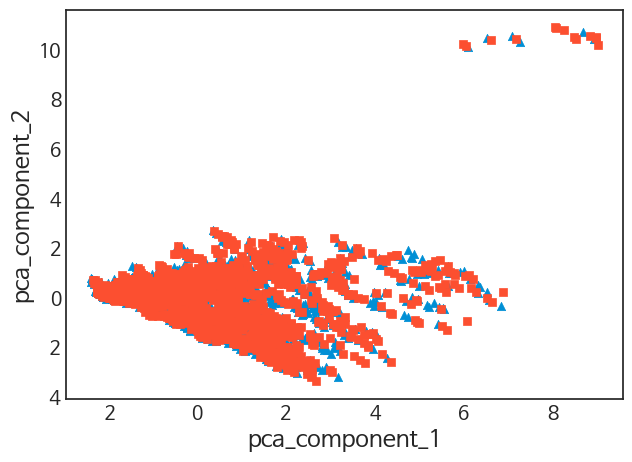

In [ ]:
#PCA로 차원 축소된 데이터셋 시각화 
markers=['^', 's']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = DF_pca[DF_pca['target']==i]['pca_component_1']
    y_axis_data = DF_pca[DF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(DF_pca, x='pca_component_1', y='pca_component_2', z='pca_component_3', 
                    template="plotly_white",
                    color='target', symbol='target', opacity=0.6)

fig.update_layout(height = 600, width = 900, hovermode = 'closest')

## 3차원 t-SNE 임베딩

In [ ]:
# 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(X)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])
tsne_df['target'] = y
tsne_df

In [ ]:
tsne_df['target'] = y
tsne_df

In [ ]:
import plotly.express as px
fig = px.scatter_3d(tsne_df, x='component 0', y='component 1', z='component 2', 
                    template="plotly_dark",
                    color='target', symbol='target', opacity=0.6)

fig.update_layout(height = 600, width = 800, hovermode = 'closest')

In [ ]:
y_train.value_counts()

In [ ]:
X_train

In [ ]:
X_test

# 모델링

In [ ]:
plt.style.use('default')

# SVM

SVM training accuracy : 76.86533212010919 %
SVM testing accuracy : 67.9090909090909 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       506
           1       0.73      0.65      0.69       594

    accuracy                           0.68      1100
   macro avg       0.68      0.68      0.68      1100
weighted avg       0.68      0.68      0.68      1100

--------------------------------------------------------------------------
[[360 146]
 [207 387]]
--------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, '<< Support Vector Machine >>')

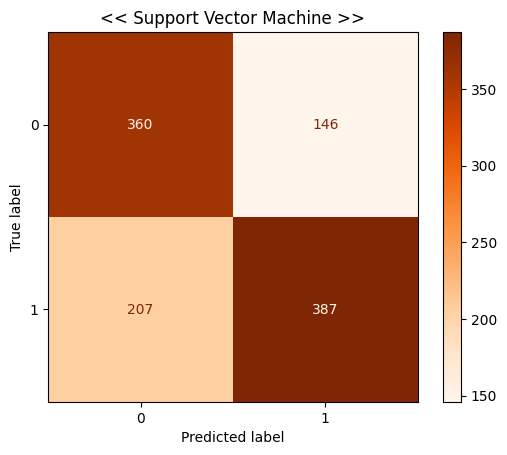

In [ ]:
from sklearn.svm import SVC
# ------------- 서포트 벡터 머신 --------------------
svm_clf = SVC(C=4, gamma=1, probability=True)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)
svm_acc = svm_clf.score(X_test,  y_test )
# ---------------------------------------------------
print("SVM training accuracy :", svm_clf.score(X_train, y_train )*100, "%")
print("SVM testing accuracy :", svm_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test , svm_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test , svm_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
plot_confusion_matrix(svm_clf, X_test,  y_test, cmap='Oranges')
plt.title("<< Support Vector Machine >>")

In [ ]:
svm_pred_proba

In [ ]:
y_test

In [ ]:
X_test['svm_pred_0'] = svm_pred_proba[:,0]
X_test['svm_pred_1'] = svm_pred_proba[:,1]
X_test

In [ ]:
len(svm_pred_proba)

## SVM 그리드 서치 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
start = time.time()
# defining parameter range
param_grid = {'C': [0.1, 0.5 ,1, 3],
              'gamma': [0.1, 0.5 ,1 ,3],
              'degree' [3,4,5,6],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
end = time.time() 
print('Execution time is:', end - start) 

In [ ]:
print("SVM 최적 점수 : {}".format(grid.best_score_))
print("SVM 최적 파라미터 : {}".format(grid.best_params_))
print(grid.best_estimator_)

# 랜덤 포레스트

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 70.36363636363636 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       506
           1       0.74      0.70      0.72       594

    accuracy                           0.70      1100
   macro avg       0.70      0.70      0.70      1100
weighted avg       0.71      0.70      0.70      1100

--------------------------------------------------------------------------
[[357 149]
 [177 417]]
--------------------------------------------------------------------------
Execution time is:
7.2102580070495605


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, '<< Random Forest >>')

<Figure size 1000x1000 with 0 Axes>

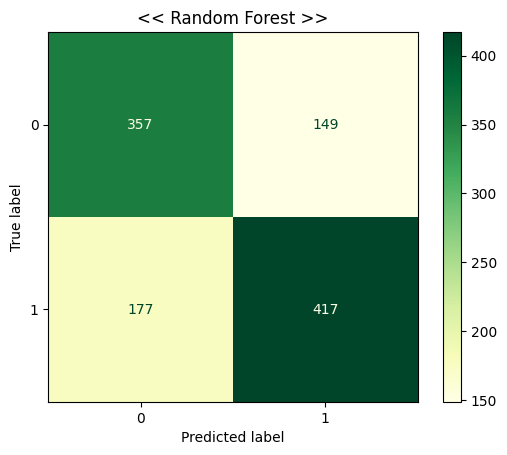

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# ------- 랜덤포레스트 ---------
rnd_clf = RandomForestClassifier(max_depth=30, n_estimators=400, min_samples_leaf=1, 
                                 max_features='auto', criterion='gini', oob_score=True,
                                 n_jobs=-1, random_state=42)

rnd_clf.fit( X_train, y_train ) #학습
rnd_clf_pred = rnd_clf.predict( X_test ) #X_test 예측
rnd_clf_proba = rnd_clf.predict_proba(X_test)
rnd_clf_acc = rnd_clf.score(X_test, y_test) # 정확도(Accuracy) 출력 
# --------------------------------
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train, y_train)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, rnd_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, rnd_clf_pred))
print("--------------------------------------------------------------------------")
end = time.time() 
print('Execution time is:') 
print(end - start)
plot_confusion_matrix(rnd_clf, X_test, y_test, cmap='YlGn')
plt.title("<< Random Forest >>")

In [ ]:
rnd_clf_proba

In [ ]:
from sklearn.model_selection import GridSearchCV
start = time.time()
rnd_clf = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators':[100 , 200, 350, 500],
              'min_samples_leaf':[2, 3, 5, 8],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [7,8,9,10],
              'criterion' :['gini', 'entropy']}

gscv_rnd = GridSearchCV(rnd_clf, param_grid,cv=5)
gscv_rnd.fit(X_train, y_train)
print("랜덤포레스트 최적 점수 : {}".format(gscv_rnd.best_score_))
print("랜덤포레스트 최적 파라미터 : {}".format(gscv_rnd.best_params_))

print(gscv_rnd.best_estimator_)
end = time.time() 
print('Execution time is:') 
print(end - start)
#RandomForestClassifier(max_depth=8, min_samples_leaf=2, n_estimators=500,random_state=0)

## 랜덤포레스트 중요도

In [ ]:
features = rnd_clf.feature_names_in_
features

array(['기초생활수급자수', '지역생산', '녹지면적', '노인인구수', '재정자립도', '인구밀도', '기온'],
      dtype=object)

In [ ]:
forest_importances = pd.Series(rnd_clf.feature_importances_, index=features)

In [ ]:
for name, importance in zip(features, rnd_clf.feature_importances_):
  print(name, "=", importance)

기초생활수급자수 = 0.14650784876637302
지역생산 = 0.12129759758380276
녹지면적 = 0.11717627359768888
노인인구수 = 0.15205790045860768
재정자립도 = 0.1065784939096015
인구밀도 = 0.1302580843210374
기온 = 0.22612380136288876


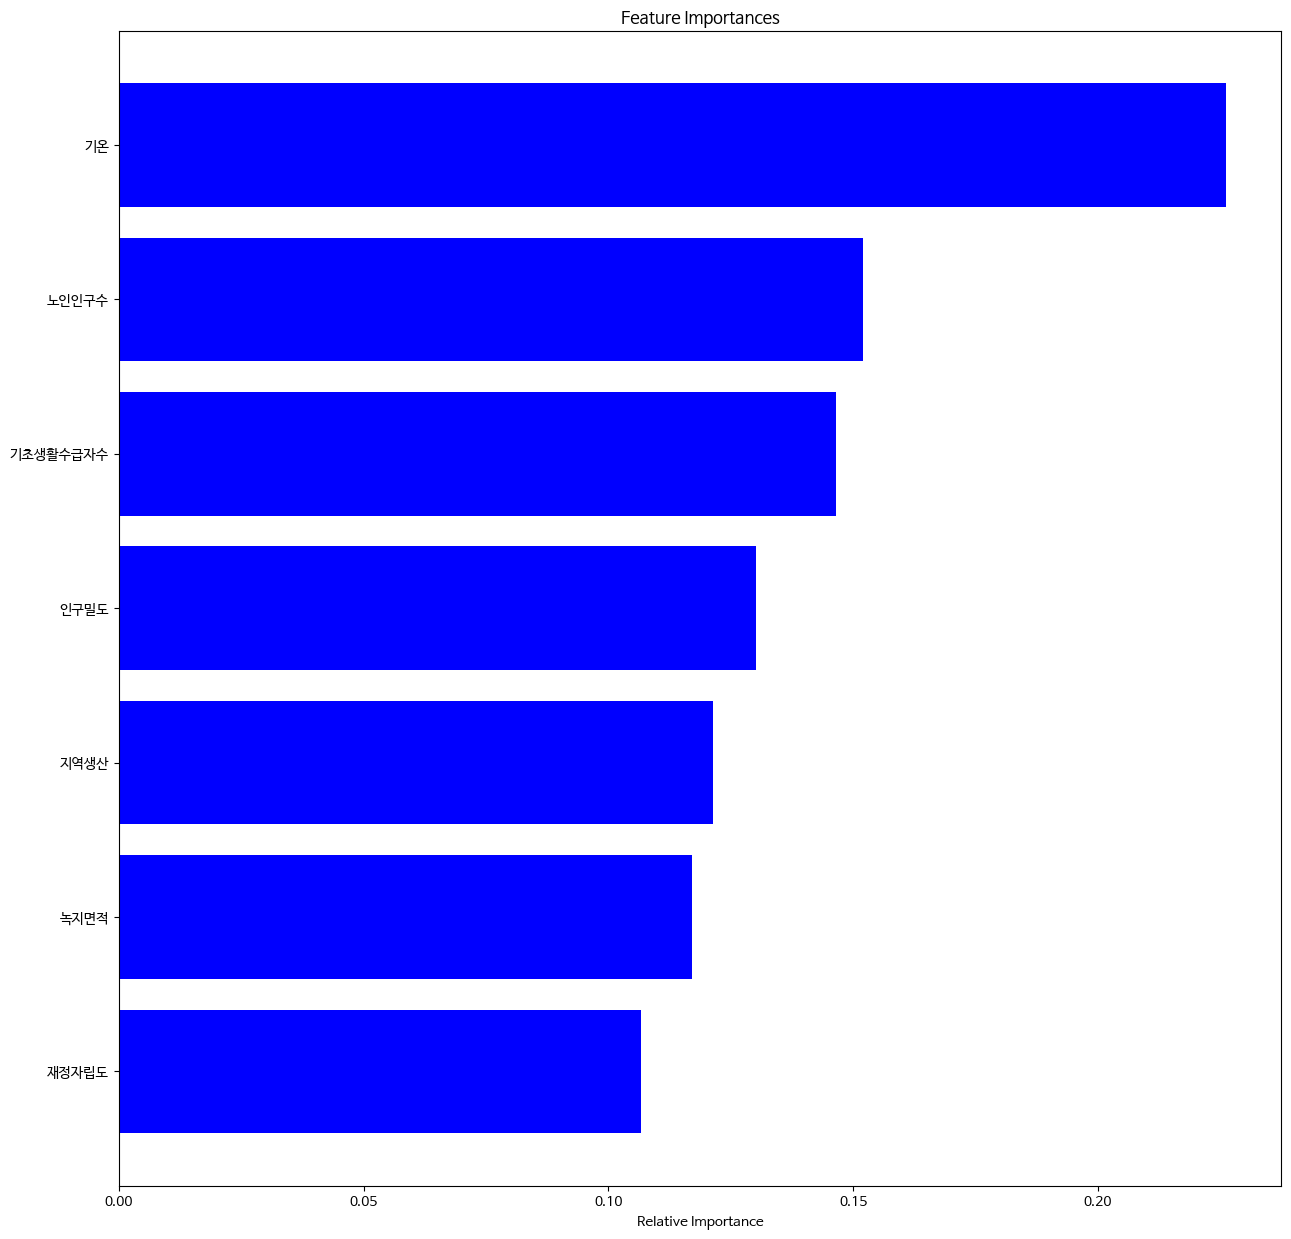

In [ ]:
indices = np.argsort(forest_importances)
plt.figure(figsize=(15, 15))
plt.rc('font', family='NanumBarunGothic')
plt.title('Feature Importances')
plt.barh(range(len(indices)), forest_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

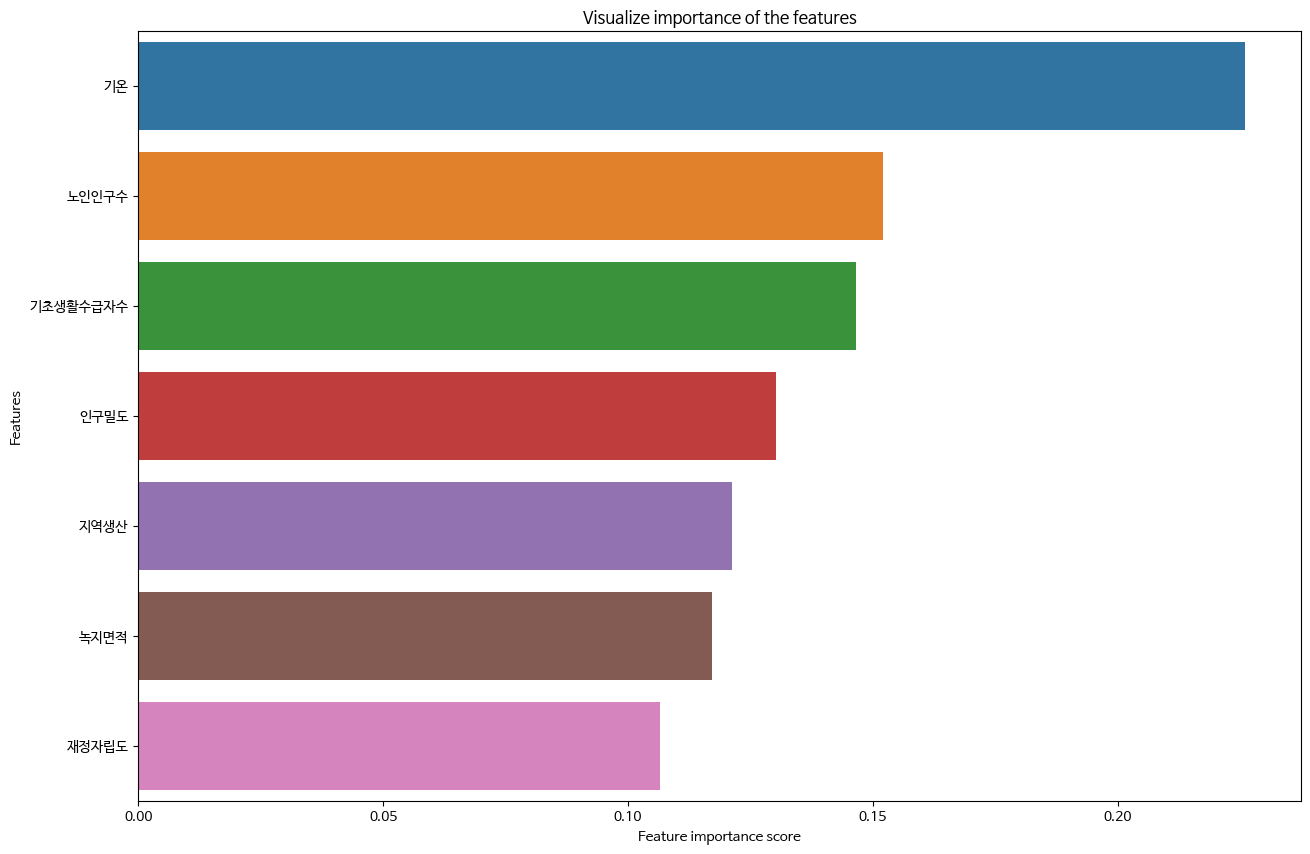

In [ ]:
# 랜덤 포레스트 변수 중요도
forest_importances = pd.Series(rnd_clf.feature_importances_)
feature_scores = pd.Series(rnd_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# 변수 중요도 seaborn bar plot
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize importance of the features")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# Light GBM

[1]	valid_0's binary_logloss: 0.674783	valid_0's binary_logloss: 0.674783
[2]	valid_0's binary_logloss: 0.662074	valid_0's binary_logloss: 0.662074
[3]	valid_0's binary_logloss: 0.651994	valid_0's binary_logloss: 0.651994
[4]	valid_0's binary_logloss: 0.642913	valid_0's binary_logloss: 0.642913
[5]	valid_0's binary_logloss: 0.636599	valid_0's binary_logloss: 0.636599
[6]	valid_0's binary_logloss: 0.630325	valid_0's binary_logloss: 0.630325
[7]	valid_0's binary_logloss: 0.624133	valid_0's binary_logloss: 0.624133
[8]	valid_0's binary_logloss: 0.61922	valid_0's binary_logloss: 0.61922
[9]	valid_0's binary_logloss: 0.61434	valid_0's binary_logloss: 0.61434
[10]	valid_0's binary_logloss: 0.610468	valid_0's binary_logloss: 0.610468
[11]	valid_0's binary_logloss: 0.607604	valid_0's binary_logloss: 0.607604
[12]	valid_0's binary_logloss: 0.604691	valid_0's binary_logloss: 0.604691
[13]	valid_0's binary_logloss: 0.601546	valid_0's binary_logloss: 0.601546
[14]	valid_0's binary_logloss: 0.60071

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, '<< Light GBM >>')

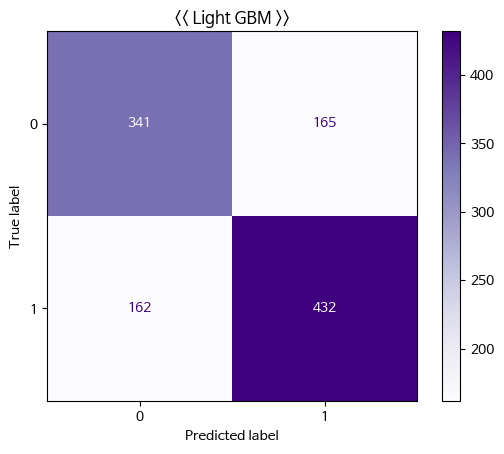

In [ ]:
from lightgbm import LGBMClassifier
# ------ Light GBM ----------------------------
lgbm = LGBMClassifier(max_depth=8, n_estimators=500, 
                      num_leaves=20,
                      subsample=0.8)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, eval_metric='logloss', eval_set=evals, verbose=True)
lgbm_pred = lgbm.predict(X_test)
lgbm_acc = lgbm.score(X_test, y_test)
# ------------------------------------------------
print("Light GBM training accuracy :", lgbm.score(X_train, y_train)*100, "%")
print("Light GBM testing accuracy :", lgbm_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, lgbm_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, lgbm_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix( lgbm, X_test, y_test, cmap='Purples')
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)
plt.title("<< Light GBM >>")

## ★★★★★ 확률 ★★★★★

In [ ]:
lgbm_pred_proba = lgbm.predict_proba(X_test)[:,1]
len(lgbm_pred_proba)

In [ ]:
lgbm_pred_proba

In [ ]:
X_test['lgbm_pred_proba'] = lgbm_pred_proba

In [ ]:
X_test

In [ ]:
np.sum(lgbm_pred_proba[1,:])

In [ ]:
rnd_clf_proba

# 그래디언트 부스팅 

그래디언트 부스팅 training accuracy : 77.47952684258416 %
그래디언트 부스팅 testing accuracy : 68.45454545454545 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       506
           1       0.72      0.69      0.70       594

    accuracy                           0.68      1100
   macro avg       0.68      0.68      0.68      1100
weighted avg       0.69      0.68      0.68      1100

--------------------------------------------------------------------------
[[345 161]
 [186 408]]
--------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, '<<Gradient Boosting>>')

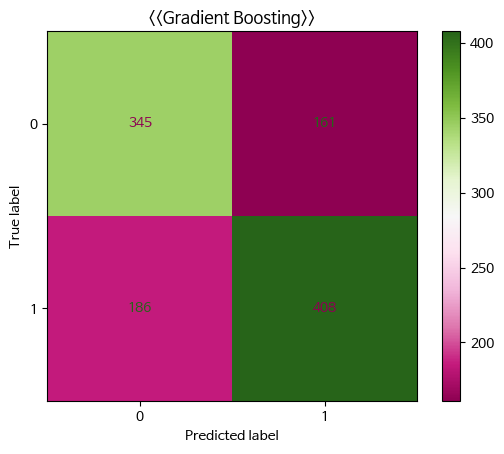

In [ ]:
### 그래디언트 부스팅 ###
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate=0.1, min_samples_leaf=5,
                           n_estimators=150)

gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_acc = gb_clf.score(X_test, y_test)
print("그래디언트 부스팅 training accuracy :", gb_clf.score(X_train, y_train)*100, "%")
print("그래디언트 부스팅 testing accuracy :", gb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, gb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, gb_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(gb_clf, X_test, y_test, cmap='PiYG')
plt.title("<<Gradient Boosting>>")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
param_gb = {
    'n_estimators' : [100, 150, 200],
    'learning_rate' : [0.05, 0.1, 0.2],
    'max_depth':[1,2, 3, 4]
}
gscv_gb = GridSearchCV(gb_clf, param_gb)
gscv_gb.fit(X_train, y_train)

print("GradientBoosting 최적 점수 : {}".format(gscv_gb.best_score_))
print("GradientBoosting 최적 파라미터 : {}".format(gscv_gb.best_params_))

print(gscv_gb.best_estimator_)

GradientBoosting 최적 점수 : 0.7040492812079843
GradientBoosting 최적 파라미터 : {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)


# 엑스트라 트리

엑스트라 트리 training accuracy : 99.36305732484077 %
엑스트라 트리 testing accuracy : 70.9090909090909 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       506
           1       0.75      0.69      0.72       594

    accuracy                           0.71      1100
   macro avg       0.71      0.71      0.71      1100
weighted avg       0.71      0.71      0.71      1100

--------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



--------------------------------------------------------------------------
[[369 137]
 [183 411]]


Text(0.5, 1.0, '<< Extra Trees >>')

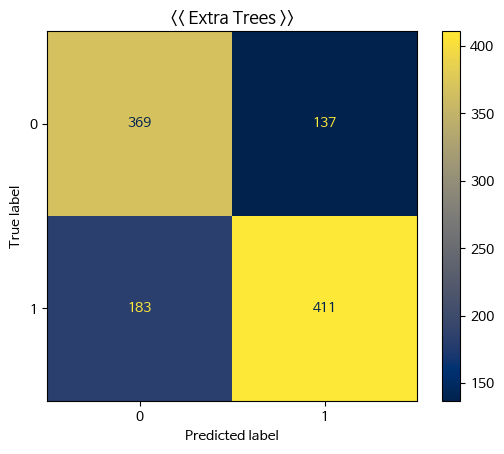

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# ---------- 엑스트라 트리 ----------------
et_clf = ExtraTreesClassifier(max_depth=19,
                                 n_estimators=160, 
                                 min_samples_leaf=1, 
                                 n_jobs=-1,
                                 random_state=0)
et_clf.fit(X_train, y_train)
et_pred = et_clf.predict(X_test)
et_acc = et_clf.score(X_test, y_test)
# -----------------------------------------
print("엑스트라 트리 training accuracy :", et_clf.score(X_train, y_train)*100, "%")
print("엑스트라 트리 testing accuracy :", et_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, et_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(et_clf, X_test, y_test, cmap='cividis')
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, et_pred))
plt.title("<< Extra Trees >>")

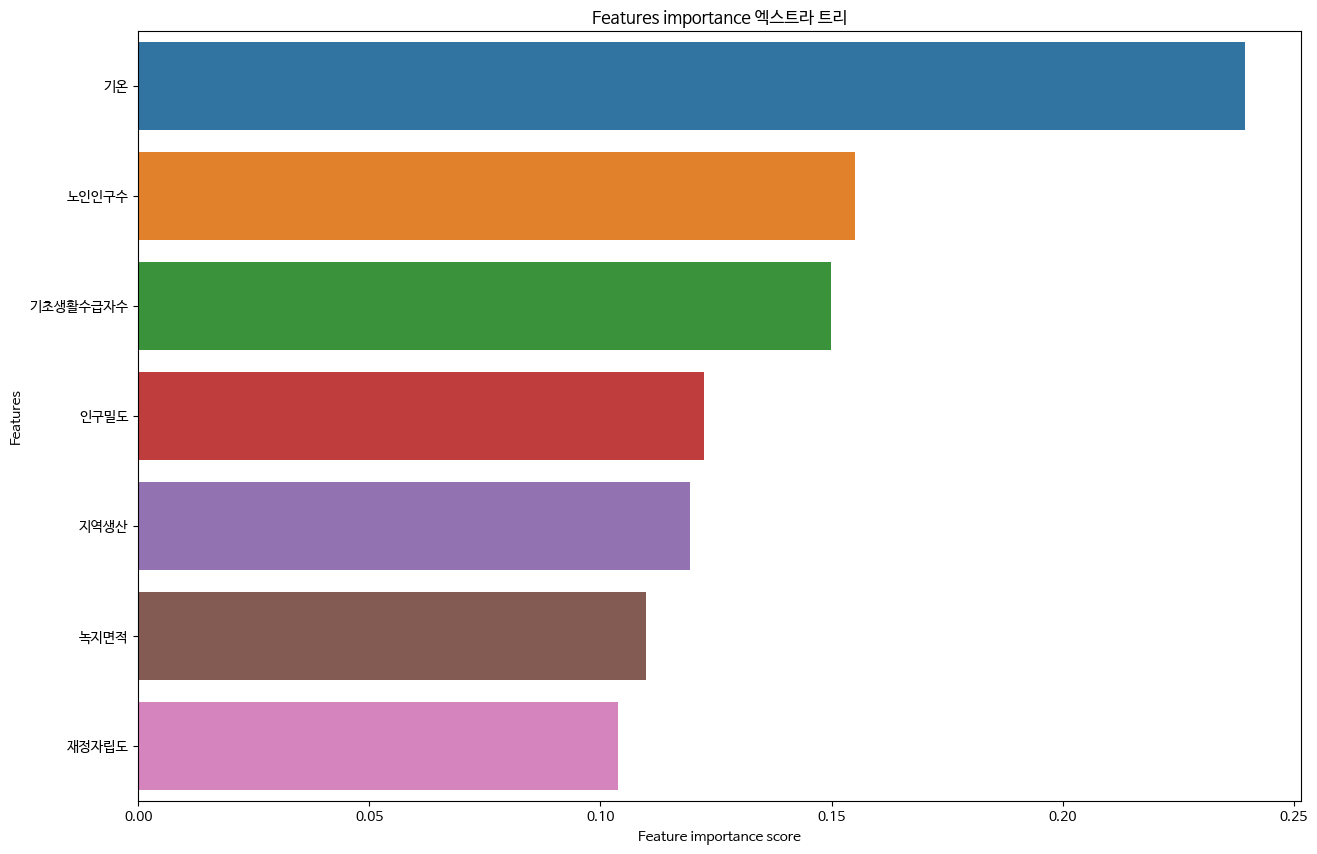

In [ ]:
# 엑스트라 트리 변수 중요도
ExtTree_importances = pd.Series(et_clf.feature_importances_)
feature_scores = pd.Series(et_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# 변수 중요도 seaborn bar plot
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Features importance 엑스트라 트리")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
X_test = X_test.drop(['온열질환발생'],axis=1)

In [ ]:
# 엑스트라 트리 예측 확률
et_pred_proba = et_clf.predict_proba(X_test)
X_test['ext_pred'] = et_pred_proba[:,1]
X_test

,기초생활수급자수,지역생산,녹지면적,노인인구수,재정자립도,인구밀도,기온,ext_pred
274,-0.867747,-0.596058,-0.390740,-0.945611,-0.960775,-0.624144,-0.117588,0.541255
765,1.214781,0.845929,0.773280,0.691581,1.518264,-0.026897,-0.831256,0.479237
122,-0.977501,-0.693096,-0.405043,-1.154579,-1.016040,-0.627325,-0.841524,0.465395
4397,-0.754874,-0.686524,-0.245159,-0.831919,-1.181836,-0.621358,-0.832847,0.245793
796,-0.439798,-0.011430,0.265509,-0.277380,0.997192,-0.579082,0.176608,0.525994
...,...,...,...,...,...,...,...,...
2652,-0.226058,-0.237914,0.576395,-0.367977,0.973507,-0.508058,-1.620911,0.219019
1141,-0.582136,-0.135717,-0.114359,-0.163605,1.826170,-0.180598,1.459670,0.267106
3015,0.748481,6.197951,-0.041941,1.441540,2.639359,1.648844,-0.592510,0.321185
1980,-0.819729,-0.649063,-0.209015,-0.667374,-0.960775,-0.619599,-0.535006,0.258599


In [ ]:
X_test.to_csv('X_test.csv', encoding='cp949')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
# ML모델의 최적의 파라미터를 찾아주는 GridSearchCV 수행
etc = ExtraTreesClassifier()
param_etc = { 'n_estimators' : [120, 130, 140, 150 , 160 ],
               'max_depth': [18, 19, 20, 21, 22]}
gscv_etc = GridSearchCV(etc, param_etc,cv=5)

gscv_etc.fit(X_train, y_train)

print("ExtraTrees 최적 점수 : {}".format(gscv_etc.best_score_))
print("ExtraTrees 최적 파라미터 : {}".format(gscv_etc.best_params_))
print(gscv_etc.best_estimator_)

ExtraTrees 최적 점수 : 0.7033710828420726
ExtraTrees 최적 파라미터 : {'max_depth': 19, 'n_estimators': 160}
ExtraTreesClassifier(max_depth=19, n_estimators=160)


# 로지스틱

In [ ]:
X_train

,기초생활수급자수,지역생산,녹지면적,노인인구수,재정자립도,인구밀도,기온
4573,-0.092068,-0.501263,-0.206970,-0.291593,-0.749608,-0.609965,1.511564
5002,0.058858,-0.359823,0.504718,-0.374847,-0.408112,-0.606116,-0.217527
1303,-0.336461,-0.505916,0.433784,-0.294117,-0.470202,-0.613350,1.182950
4430,-0.855586,-0.694996,-0.394872,-0.921409,-1.052298,-0.623957,1.300551
4436,-0.839651,-0.687404,-0.414686,-0.926222,-0.997969,-0.623954,1.132044
...,...,...,...,...,...,...,...
1355,-0.864933,-0.679629,-0.395544,-0.855057,-0.943640,-0.628087,0.588572
4249,-0.837352,-0.699048,0.014106,-0.771654,-1.230808,-0.624647,-2.224225
5282,-0.931126,-0.677734,-0.320795,-0.928239,-1.067821,-0.625976,-1.029699
2354,1.065084,-0.291243,0.147423,0.747536,-0.322738,-0.322610,-0.285841


In [ ]:
X_test

,기초생활수급자수,지역생산,녹지면적,노인인구수,재정자립도,인구밀도,기온
274,-0.867747,-0.596058,-0.390740,-0.945611,-0.960775,-0.624144,-0.117588
765,1.214781,0.845929,0.773280,0.691581,1.518264,-0.026897,-0.831256
122,-0.977501,-0.693096,-0.405043,-1.154579,-1.016040,-0.627325,-0.841524
4397,-0.754874,-0.686524,-0.245159,-0.831919,-1.181836,-0.621358,-0.832847
796,-0.439798,-0.011430,0.265509,-0.277380,0.997192,-0.579082,0.176608
...,...,...,...,...,...,...,...
2652,-0.226058,-0.237914,0.576395,-0.367977,0.973507,-0.508058,-1.620911
1141,-0.582136,-0.135717,-0.114359,-0.163605,1.826170,-0.180598,1.459670
3015,0.748481,6.197951,-0.041941,1.441540,2.639359,1.648844,-0.592510
1980,-0.819729,-0.649063,-0.209015,-0.667374,-0.960775,-0.619599,-0.535006


로지스틱 회귀 training accuracy : 65.8098271155596 %
로지스틱 회귀 testing accuracy : 67.27272727272727 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       506
           1       0.69      0.70      0.70       594

    accuracy                           0.67      1100
   macro avg       0.67      0.67      0.67      1100
weighted avg       0.67      0.67      0.67      1100

--------------------------------------------------------------------------
[[322 184]
 [176 418]]
--------------------------------------------------------------------------
로지스틱 회귀 수행시간 :
0.04320883750915527


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, '<< Logistic Regression >>')

<Figure size 2000x2000 with 0 Axes>

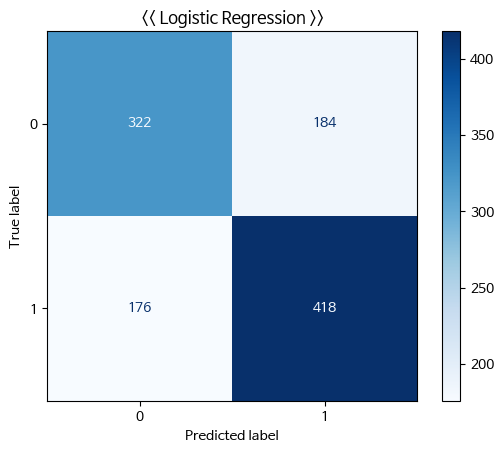

In [ ]:
from sklearn.linear_model import LogisticRegression
### 로지스틱 회귀 ###
#----------------------------------------------
lr = LogisticRegression(C=3, max_iter=10, random_state=0)
lr.fit( X_train, y_train )
lr_pred = lr.predict( X_test )
lr_acc = lr.score( X_test, y_test )
#----------------------------------------------
print("로지스틱 회귀 training accuracy :", lr.score( X_train , y_train )*100, "%")
print("로지스틱 회귀 testing accuracy :", lr_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report( y_test, lr_pred ))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test, lr_pred ))
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('로지스틱 회귀 수행시간 :') 
print(end - start)

plt.figure(figsize=(20, 20))
plot_confusion_matrix(lr , X_test , y_test , cmap='Blues')
plt.title("<< Logistic Regression >>")

## 로지스틱 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV   #효과적인 하이퍼 파라미터 세팅을 찾아줌
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression( random_state = 0 )

params = {'C' : [3, 6, 10],
          'max_iter' : [10, 30, 50, 100],
          "penalty":["l1","l2"]
          }
lr_grid_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

import time
start = time.time()
#----------------------------------------------
lr_grid_cv.fit(X_train, y_train)
print("로지스틱 최적 점수 : {}".format(lr_grid_cv.best_score_))
print("로지스틱 최적 파라미터 : {}".format(lr_grid_cv.best_params_))
print(lr_grid_cv.best_estimator_)
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

로지스틱 최적 점수 : 0.6580980805733913
로지스틱 최적 파라미터 : {'C': 3, 'max_iter': 10, 'penalty': 'l2'}
LogisticRegression(C=3, max_iter=10, random_state=0)
--------------------------------------------------------------------------
Execution time is:
2.2358429431915283


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

# KNN

KNN training accuracy : 77.54777070063695 %
KNN testing accuracy : 67.81818181818183 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       506
           1       0.71      0.69      0.70       594

    accuracy                           0.68      1100
   macro avg       0.68      0.68      0.68      1100
weighted avg       0.68      0.68      0.68      1100

--------------------------------------------------------------------------
[[337 169]
 [185 409]]
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Execution time is:
0.3670947551727295


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



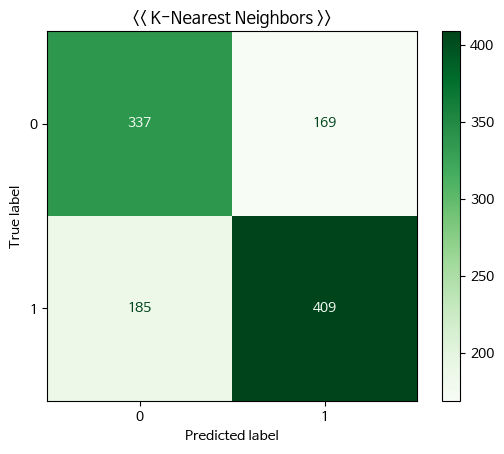

In [ ]:
### K 최근접 이웃 ###
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
#------------ KNN -----------------------------
knn_clf = KNeighborsClassifier()
knn_clf.fit( X_train, y_train )
knn_pred = knn_clf.predict(X_test)
knn_acc = knn_clf.score(X_test,  y_test )
#----------------------------------------------
print("KNN training accuracy :", knn_clf.score(X_train, y_train )*100, "%")
print("KNN testing accuracy :", knn_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test , knn_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test , knn_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(knn_clf, X_test, y_test , cmap='Greens')
plt.title("<< K-Nearest Neighbors >>")
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

Execution time is:
2.2763049602508545


Text(0.5, 1.0, '<< K-Nearest Neighbors >>')

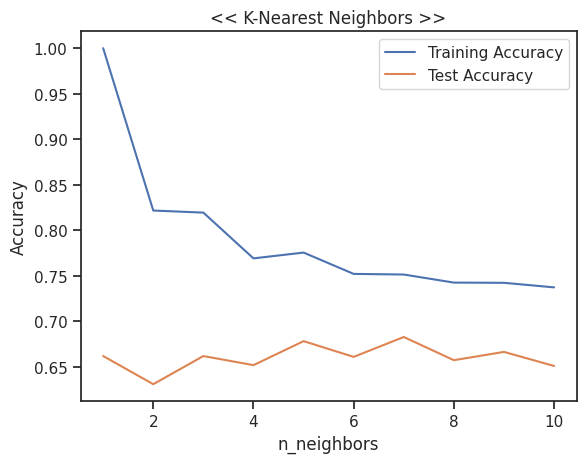

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
# n_neighbors에 따른 정확도를 넣을 array 준비
training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1, 11)

start = time.time()
#----------------------------------------------
for n_neighbors in neighbors_setting:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit( X_train, y_train )
    # 훈련 셋 정확도 저장
    training_accuracy.append(knn.score(X_train, y_train ))
    # 테스트 셋 정확도 저장
    test_accuracy.append(knn.score(X_test, y_test ))

plt.title("[ KNN Accuracy from n_neighbors ]")
plt.plot(neighbors_setting, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_setting, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
plt.title("<< K-Nearest Neighbors >>")

# Sequatial

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Sequential 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='sigmoid', input_shape=(7, )),
    tf.keras.layers.Dense(units=39, activation='sigmoid'),
    tf.keras.layers.Dense(units=26, activation='sigmoid'),
    tf.keras.layers.Dense(units=1)
])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.6f" % (loaded_model.evaluate(X_test, y_test)[1]))
############## loss와 validation loss 값 그래프 #############
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

Epoch 1/100
110/110 [==============================] - 3s 9ms/step - loss: 0.3249 - val_loss: 0.2341
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 0.2201 - val_loss: 0.2188
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2274 - val_loss: 0.2274
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2194 - val_loss: 0.2224
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 0.2155 - val_loss: 0.2188
Epoch 6/100
110/110 [==============================] - 1s 6ms/step - loss: 0.2154 - val_loss: 0.2189
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.2116 - val_loss: 0.2153
Epoch 8/100
110/110 [==============================] - 1s 6ms/step - loss: 0.2115 - val_loss: 0.2138
Epoch 9/100
110/110 [==============================] - 1s 9ms/step - loss: 0.2109 - val_loss: 0.2187
Epoch 10/100
110/110 [==============================] - 1s 5ms/step - loss: 0.2122 - val_lo

OSError: ignored

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.6f" % (loaded_model.evaluate(X_test, y_test)[1]))

OSError: ignored

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time
start = time.time()
# ----------------------------------------------
embedding_dim = 100
hidden_units = 256
#hidden_units = 128 로 했을때는 85% 정확도

model = Sequential()
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.6f" % (loaded_model.evaluate(X_test, y_test)[1]))

Epoch 1/15


ValueError: ignored

In [ ]:
y_test['pred'] = predicted

In [ ]:
y_test.head(10)

274     1
765     0
122     0
4397    0
796     0
153     0
2001    0
3481    0
1214    0
2738    1
Name: 온열질환발생여부, dtype: object

In [ ]:
y_test

274                                                     1
765                                                     0
122                                                     0
4397                                                    0
796                                                     0
                              ...                        
1141                                                    0
3015                                                    1
1980                                                    0
1787                                                    1
pred    [[0.33918357], [0.5759365], [0.33918357], [0.3...
Name: 온열질환발생여부, Length: 1101, dtype: object

In [ ]:
a = y_test == y_test['pred']

ValueError: ignored

In [ ]:
sum(a)

NameError: ignored

In [ ]:
sum(a)/len(test_Y)

NameError: ignored

# XG boosting

XGBoost training accuracy : 95.74613284804367 %
XGBoost testing accuracy : 70.27272727272728 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       506
           1       0.73      0.71      0.72       594

    accuracy                           0.70      1100
   macro avg       0.70      0.70      0.70      1100
weighted avg       0.70      0.70      0.70      1100

--------------------------------------------------------------------------
[[350 156]
 [171 423]]
--------------------------------------------------------------------------
Execution time is:
5.501186847686768


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



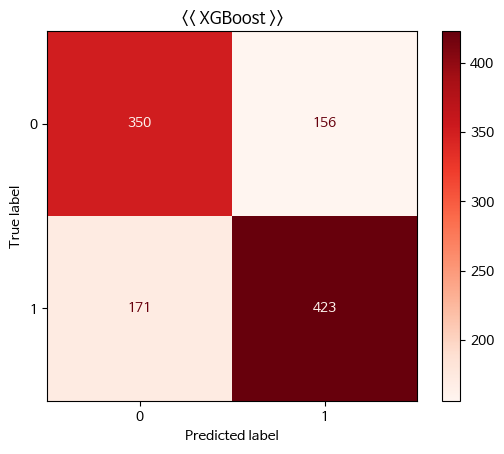

In [ ]:
### XGBoost ###
from xgboost import XGBClassifier
start = time.time()
#------XGBoost---------------------------------
xgb_clf = XGBClassifier(max_depth=30, n_estimators=500, early_stopping_rounds = 200, 
                        reg_alpha=3 ,
                        subsample=0.8, 
                        colsample_bytree=0.6,
                        min_child_weight=5,
                        random_state=0) 
xgb_clf.fit( X_train, y_train )
xgb_pred = xgb_clf.predict( X_test )
xgb_acc = xgb_clf.score(X_test, y_test )
#----------------------------------------------
print("XGBoost training accuracy :", xgb_clf.score( X_train, y_train )*100, "%")
print("XGBoost testing accuracy :", xgb_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report( y_test , xgb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test , xgb_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
plot_confusion_matrix(xgb_clf, X_test, y_test , cmap='Reds' )
plt.title("<< XGBoost >>")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)

In [ ]:
xgb_pred_proba = xgb_clf.predict_proba( X_test )
xgb_pred_proba

array([[0.31790805, 0.68209195],
       [0.9075105 , 0.09248951],
       [0.934599  , 0.06540103],
       ...,
       [0.88027513, 0.11972487],
       [0.919702  , 0.08029801],
       [0.47509116, 0.52490884]], dtype=float32)

# 나이브 베이즈

Naive Bayes training accuracy : 63.2393084622384 %
Naive Bayes testing accuracy : 62.272727272727266 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       506
           1       0.66      0.62      0.64       594

    accuracy                           0.62      1100
   macro avg       0.62      0.62      0.62      1100
weighted avg       0.62      0.62      0.62      1100

--------------------------------------------------------------------------
[[314 192]
 [223 371]]
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Execution time is:
0.07145500183105469


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



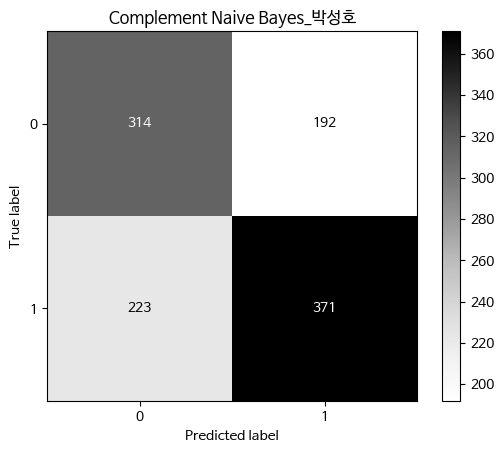

In [ ]:
from sklearn.naive_bayes import ComplementNB
# --------- 나이브 베이즈 -----------------------
nb_clf = BernoulliNB(alpha = 0.5, binarize=0.5)
nb_clf.fit( X_train, y_train)
nb_pred = nb_clf.predict( X_test )
nb_acc = nb_clf.score( X_test, y_test )
# -----------------------------------------------
print("Naive Bayes training accuracy :", nb_clf.score( X_train , y_train )*100, "%")
print("Naive Bayes testing accuracy :", nb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, nb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, nb_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(nb_clf, X_test, y_test, cmap='Greys')
plt.title("Complement Naive Bayes_박성호")
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

# Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
# Voting
named_estimators = [
    #("svm", svm_clf),
    ("random_forest", rnd_clf),
    ("Light GBM", lgbm),
    ("Gradient Boosting", gb_clf),
    ("extra_trees", et_clf),
    ("XG Boost", xgb_clf)
]
voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.7154545454545455

In [ ]:
voting_clf.voting = "hard"
voting_acc = voting_clf.score(X_test, y_test)

In [ ]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.7036363636363636,
 0.7027272727272728,
 0.7090909090909091,
 0.7027272727272728]

# 모델평가

In [ ]:
models_acc = {'Gradient Boosting':gb_acc*100 , 
              'Extra Tree':et_acc*100 , 
              'SVM':svm_acc*100, 
              'Logistic Regression' : lr_acc*100,
              'LighGBM':lgbm_acc*100 , 
              'Random Forest': rnd_clf_acc*100 , 
              'XG Boost':xgb_acc*100,
              'Voting' : voting_acc*100
              }
models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['정확도']
models_acc_df['모델'] = ['Gradient Boosting', 'Extra Tree', 'SVM', 'Logistic Regression',
                          'LighGBM', 'Random Forest', 'XG Boost', 'Voting']
models_acc_df.set_index(pd.Index([1, 2 , 3 , 4 , 5 , 6, 7, 8]))

,정확도,모델
1,68.454545,Gradient Boosting
2,70.909091,Extra Tree
3,67.909091,SVM
4,67.272727,Logistic Regression
5,70.272727,LighGBM
6,70.363636,Random Forest
7,70.272727,XG Boost
8,70.818182,Voting


In [ ]:
import plotly.express as px
fig = px.bar(models_acc_df, x='정확도', y='모델' ,color='모델', range_x=(50,80), template="plotly_dark", text_auto='.4s',
            title="<< 최종 모델평가 >>" )
fig.update_traces(textfont_size=15, textangle=0, textposition="inside", cliponaxis=False)
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(height = 600, width = 1000, hovermode = 'closest')
fig.update_layout(coloraxis = {'colorscale':'Bluered_r'})